# **Loan Default Prediction**

**Objective**: build a classification model to predict clients who are likely to default on their loan and give recommendations to the bank on the important features to consider while approving a loan.


**Data Description**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.

BAD: 1 = Client defaulted on loan, 0 = loan repaid

LOAN: Amount of loan approved.

MORTDUE: Amount due on the existing mortgage.

VALUE: Current value of the property.

REASON: Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

JOB: The type of job that loan applicant has such as manager, self, etc.

YOJ: Years at present job.

DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments).

DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

CLAGE: Age of the oldest credit line in months.

NINQ: Number of recent credit inquiries.

CLNO: Number of existing credit lines.

DEBTINC: Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

# Context, Objective and Key Questions
### Context

**Loan default represents one of the key financial risk for a bank, and therefore has to be well understood in order to be minised**. The understanding of this risk goes through the definition of the key variable values that are correlated with higher default rates, and therefore higher risks. To do so, we will conduct the EDA to build some intuition / understanding of the context, before moving to the model building.

### Objectives

The objective is to **develop a model that will help guide the bank's risk monitoring, assessment, and mitigation system** by developping a better understanding of the **risk profile of defaulting clients**, but also, and crucially so, the **key features that characterise them**. In order to avoid any discrimination imputed onto clients, we will develop decision tree, random forest and a number of other models aimed at identifying the key features, that, away from a demographics-based profile, characterise risk-prone behaviours, and should therefore be monitored by the bank to mitigate and limit risk exposure.

### Key Questions
The key questions to address through this analysis are the following:
- What are the key characterics of defaulting clients for each variable? (gen. profile)
- What are the variables which are correlated to the highest default rates? (if high correlation = priority features of the risk matrix) On that basis, what risk mitigation mechanisms could the bank implement?
- What are the key features identified through the Decision Tree which indicate that a client is likely to default? And therefore, what behaviours/patterns should the bank monitor, and when should it implement mitigating mechanisms to decrease exposure to default risk?

## **Import and Load**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics

# Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

#Tree and Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

#Tuning and Boosting
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
import catboost as cb
!pip install lightgbm
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

#Column display and numericals simplication for readability purposes
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format",lambda x:"%.3f" % x)#



In [ ]:
data=pd.read_csv("/Users/elsabendine/Desktop/Capstone Project/hmeq.csv")

# Data Overview & Cleaning

### *Getting a first sense of the dataset structure and content*

In [ ]:
dt=data.copy()
print("Data Shape :", dt.shape)

Data Shape : (5960, 13)


In [ ]:
dt.head().T

0         1         2     3          4
BAD             1         1         1     1          0
LOAN         1100      1300      1500  1500       1700
MORTDUE 25860.000 70053.000 13500.000   NaN  97800.000
VALUE   39025.000 68400.000 16700.000   NaN 112000.000
REASON    HomeImp   HomeImp   HomeImp   NaN    HomeImp
JOB         Other     Other     Other   NaN     Office
YOJ        10.500     7.000     4.000   NaN      3.000
DEROG       0.000     0.000     0.000   NaN      0.000
DELINQ      0.000     2.000     0.000   NaN      0.000
CLAGE      94.367   121.833   149.467   NaN     93.333
NINQ        1.000     0.000     1.000   NaN      0.000
CLNO        9.000    14.000    10.000   NaN     14.000
DEBTINC       NaN       NaN       NaN   NaN        NaN

**Data Overview**
Reading the dataset
Understanding the shape of the dataset
Checking the data types
Checking for missing values
Checking for duplicated values

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Notes: all values but REASON and JOB are numerical, split between int and float types.
Let's look at unique values in each variable.

### *Null Values & Duplicates*

In [ ]:
dt.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [ ]:
dt.duplicated().sum()

0

In [ ]:
dt.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
missing=dt.isna().sum()
print("Percentage of missing values per feature/variable")
print(missing/len(dt)*100)

Percentage of missing values per feature/variable
BAD        0.000
LOAN       0.000
MORTDUE    8.691
VALUE      1.879
REASON     4.228
JOB        4.681
YOJ        8.641
DEROG     11.879
DELINQ     9.732
CLAGE      5.168
NINQ       8.557
CLNO       3.725
DEBTINC   21.258
dtype: float64


**Observations** :

- .info() - all values but REASON and JOB are numerical, split between int and float types. Let's look at unique values in each variable.
- **Unique Values**: We note that there is no strictly unique value in the data set (in which nunique= n rows).
- **Duplicated Values**: no duplicates.
- **Null Values**: the dataset presents a **considerable amount of missing values**. Only the BAD and LOAN indicators are fully filled out, while the other features present from 112 to 1267 missing values out of a total of 5960 rows, representing from **1.879% to 21.258%**. All the features, but one, have missing values ranging from 1.879 to 11.979, the extreme value presenting 21.258% of NaN. Nonetheless, the proportion remains acceptable to impute median/mode treatment without creating too much bias.

**We will proceed with the analysis before implementing the missing values treatment, in order to ensure that we do not to influence the EDA.**

# Exploratory Data Analysis (EDA)

*Note for the Evaluator*: the guiding questions will be addressed in two steps:
- **Initional Observations** the end of the Univariate Analysis of the Numerical Variable and Categorical Variable sections (for the initial observation questions),
- **Further Observations and Insights** at the end of the EDA (after the bivariate and multivariate analyses).

## **Univariate Analysis**

In [ ]:
num_col=["BAD", "LOAN", "MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]
cat_col=["REASON", "JOB"]

### **Numerical Variables**

**Summary Statistics**

In [ ]:
dt[num_cat].describe().T

count       mean       std      min       25%       50%        75%  \
BAD     5960.000      0.199     0.400    0.000     0.000     0.000      0.000   
LOAN    5960.000  18607.970 11207.480 1100.000 11100.000 16300.000  23300.000   
MORTDUE 5442.000  73760.817 44457.609 2063.000 46276.000 65019.000  91488.000   
VALUE   5848.000 101776.049 57385.775 8000.000 66075.500 89235.500 119824.250   
YOJ     5445.000      8.922     7.574    0.000     3.000     7.000     13.000   
DEROG   5252.000      0.255     0.846    0.000     0.000     0.000      0.000   
DELINQ  5380.000      0.449     1.127    0.000     0.000     0.000      0.000   
CLAGE   5652.000    179.766    85.810    0.000   115.117   173.467    231.562   
NINQ    5450.000      1.186     1.729    0.000     0.000     1.000      2.000   
CLNO    5738.000     21.296    10.139    0.000    15.000    20.000     26.000   
DEBTINC 4693.000     33.780     8.602    0.524    29.140    34.818     39.003   

               max  
BAD          1.000  
LOAN     89900.000  
MORTDUE 399550.000  
VALUE   855909.000  
YOJ         41.000  
DEROG       10.000  
DELINQ      15.000  
CLAGE     1168.234  
NINQ        17.000  
CLNO        71.000  
DEBTINC    203.312

**Visualisation**

In [ ]:
#Setting the titles
feature_descriptions={
    "BAD":"Defaulting Clients (BAD)",
    "LOAN": "Approved Loan Value (LOAN)",
    "MORTDUE": "Existing Mortgage Value (MORTDUE)" ,
    "VALUE":"Property Value (VALUE)",
    "REASON":"Loan Request Reason (REASON)",
    "JOB":"Type of Job (JOB)",
    "YOJ":"Years at Job (YOJ)",
    "DEROG": "Derogatory Reports (DEROG)",
    "DELINQ":"Delinquent Credit Lines (DELINQ)",
    "CLAGE":"Oldest Credit Line Age (CLAGE)",
    "NINQ":"Recent Credit Inquiries (NINQ)",
    "CLNO":"Existing Credit Lines (CLNO)",
    "DEBTINC":"Debt-to-Income Ratio (DEBTINC)",
}
def title_graph(col):
  description=feature_descriptions.get(col)
  return f'{description} Distribution'

In [ ]:
#Visualisation of Numerical Variables
def hist_box(col):
    f, (ax_box, ax_hist)=plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.15,0.85)}, figsize=(7,5))
    sns.set(style="darkgrid")
    title=title_graph(col)
    sns.boxplot(x=dt[col], ax=ax_box, showmeans=True, color="darkseagreen", meanprops={"marker":"s", "markerfacecolor":"black"}).set_title(title)
    sns.distplot(dt[col],ax=ax_hist, color="darkblue")
    ax_hist.axvline(dt[col].mean(), color="black", linestyle="-.")
    ax_hist.axvline(dt[col].median(), color="orange", linestyle="-")
    plt.show()

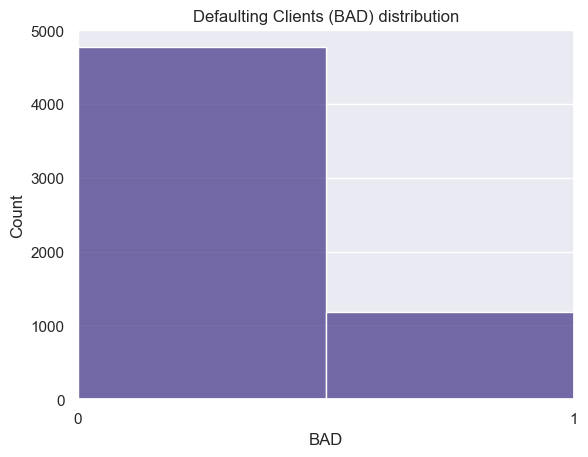

In [ ]:
fix, ax=plt.subplots()
sns.histplot(x=dt["BAD"], bins=2, color="darkslateblue").set_title("Defaulting Clients (BAD) distribution")
ax.set_xlim(0, 1)
ax.set_xticks(range(0, 2))
plt.show()

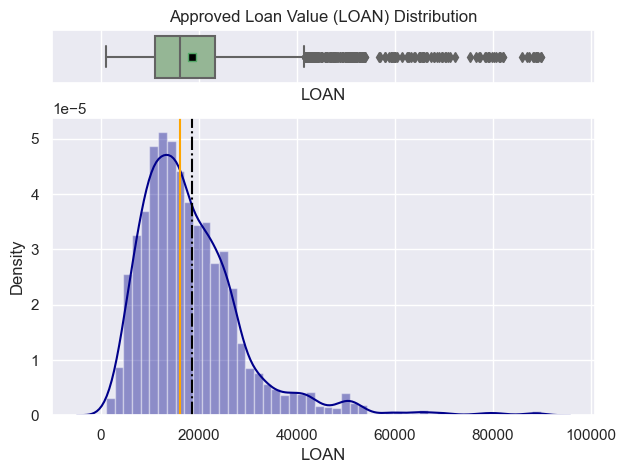

In [ ]:
hist_box("LOAN")

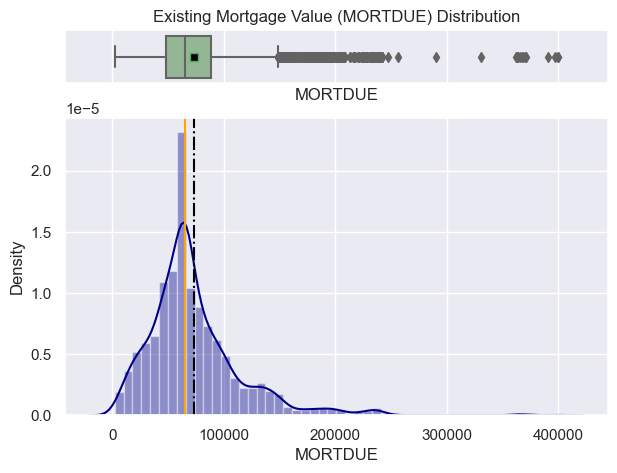

In [ ]:
hist_box("MORTDUE")

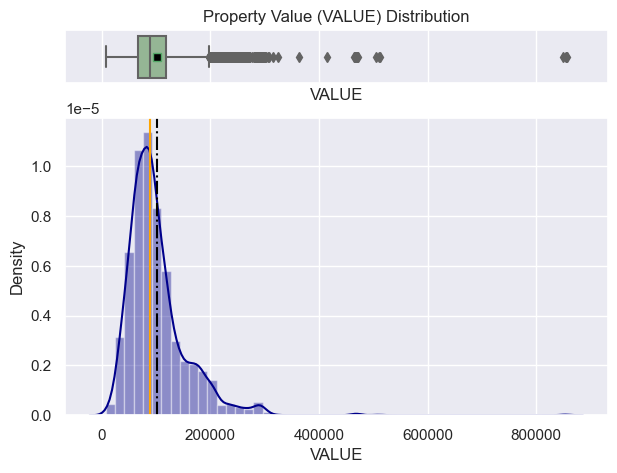

In [ ]:
hist_box("VALUE")

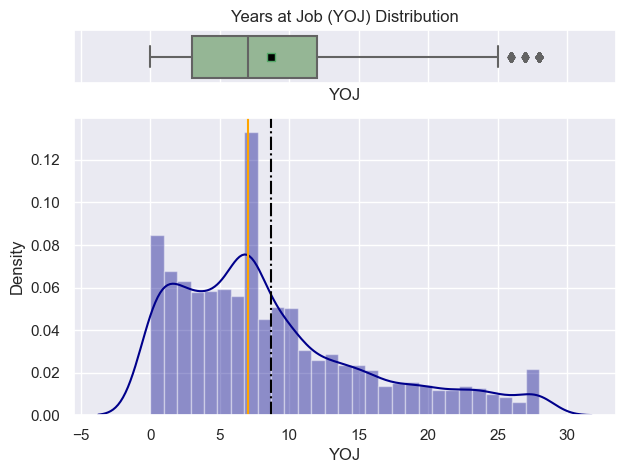

In [ ]:
hist_box("YOJ")

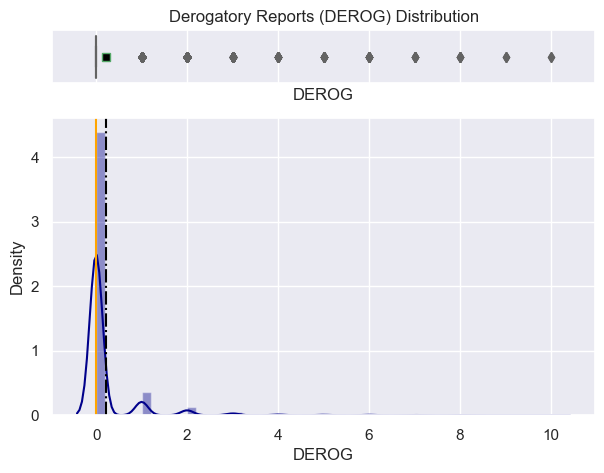

In [ ]:
hist_box("DEROG")

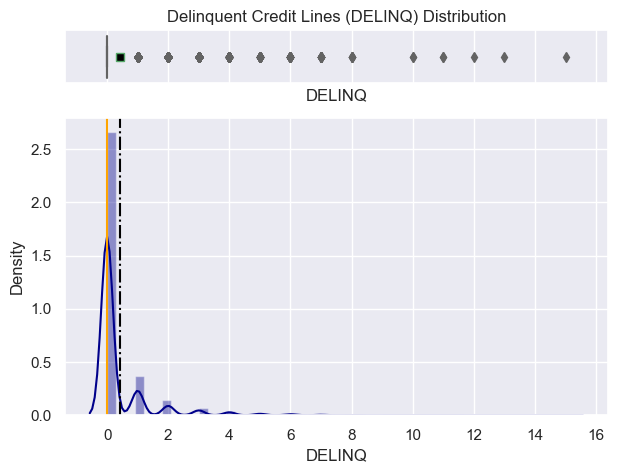

In [ ]:
hist_box("DELINQ")

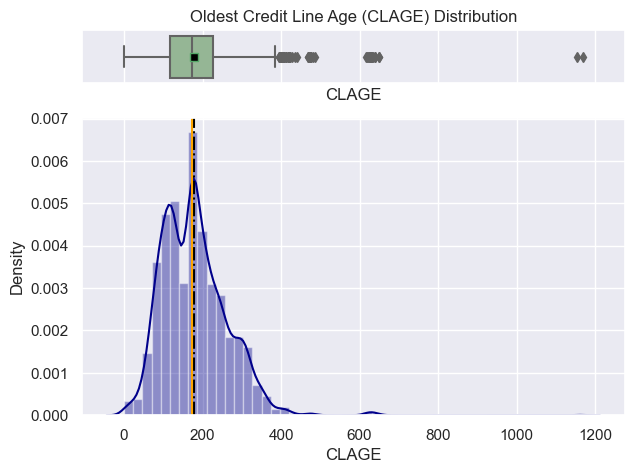

In [ ]:
hist_box("CLAGE")

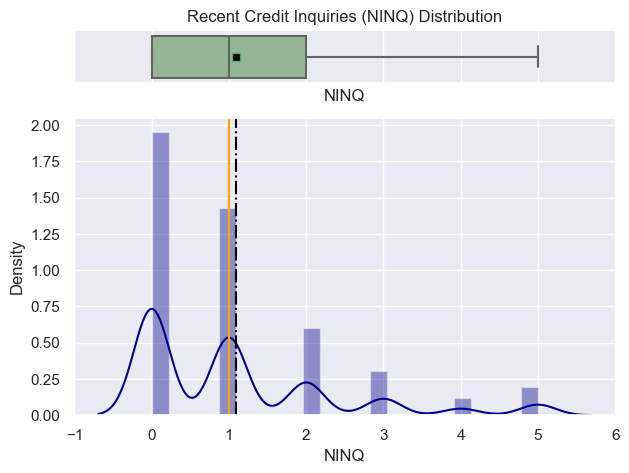

In [ ]:
hist_box("NINQ")

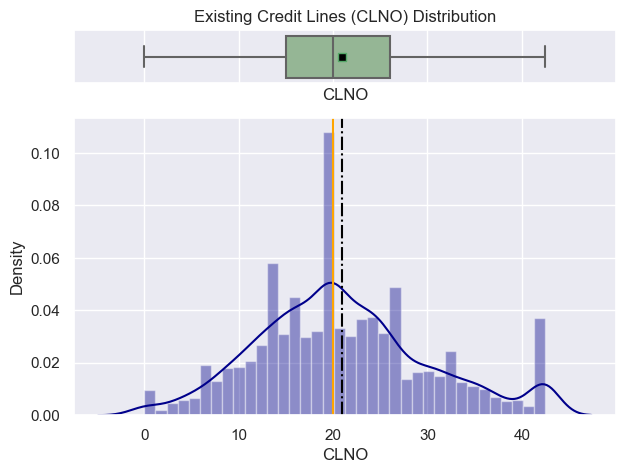

In [ ]:
hist_box("CLNO")

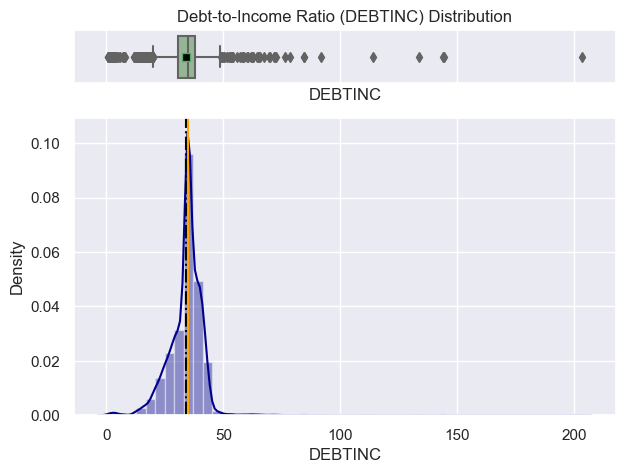

In [ ]:
hist_box("DEBTINC")

**Initial Observations**

- **BAD** : the mean value is at 0.199, which seems to demonstrate that 80% of the clients in the dataset have not defaulted to their loan (BAD=0=. As the std reached twice the value of the mean (0.4) which could reflect skewness in the data;

- **LOAN** : the Qartiles are quite uniformly distributed Q1 11.1k, Q2 at 16.3k (quite close), Q3 23.3k, however we note important outliers in both directions: lower outliers (min value 1.1k, meaning 1/10th of the Q1), but especially higher outlier (max value 89.9k, meaning almost 4 times the Q3 value). The mean value is quite close to the Q2, hence a close-to-normal distribution is expected, however the std is quite high (at 11.2k)

- **MORTDUE** : large distribution of the data. The difference between the quartiles is reasonably close (20-25k) and seems to indicate a close-to-normal distribution Q1: 46.3k, Q2: 65k, Q3: 91.5k, however we take note of strong outliers both in the min and max values. The min value: 2.1k, which is about 1/20th of the Q1 value, while the max value: 399.55k, which is about 1/4th of the Q3 value. We also note that the mean value is superior to the Q2 (73.76k), but still closer to Q2 (median) than to the Q3 value. We also note a large std (44.5k) which seems to reflect wide disparities in the dataset, and is impacted by the higher outliers which strongly impact the structure of the dataset. Comment: we take note that min MORTDUE (2.1k)> min LOAN value (1.1k). This could be because LOAN only reflects the amount of money borrowed, without taking into account the interests, while MORTDUE = (LOAN * interest rate) - LOAN payments + penalties (if any). This structure could explain a min MORTDUE > min LOAN value

- **VALUE** : large distribution of the data. The distance between the quartiles is comparable (close to 30k), and we expect a rather normal distribution between Q1: 66k, Q2: 89.2k, Q3: 119.8k, however, we note strong outliers both in the min and max values. Min value: 8k, max: 855.9k. The very strong upper outlier(s) strongly impact the structure of the data, as reflected in the std: 57.4k, which is very close to the Q1 value. This reflects a highly imbalanced data. The mean is also impacted, and surpasses the median, as it reached 101,8k.

- **YOJ** : left-skewed data with Q1: 3, Q2: 7, Q3:13 (almost twice as much as Q2). We also note outliers: min:0, and max:41. These outliers expectedly impact the mean value which surpasses the median (8.9 years) however the impact is limited, which seems to reflect a limited number of upper-outliers, or the presence of even more lower outliers which would negate the effect of the former group. The high std (7.5y, above the Q2 value), reflects a certain imbalance in the data.

- **DEROG** : the vast majority of clients (and rows) are not concerned by the feature as Q1=Q2=Q3=0, however we note the presence of upper outliers with max=10. This seems to impact the structure of the data set as mean =0.255, and std = 0.846. Nonetheless these values are low which seems to confirm that the presence of DEROG!=0 is quite marginal. We will evaluate this further in the EDA.

- **DELINQ** : Similar trend to the DEROG with Q1=Q2=Q3=0, however we note upper outlier with max value = 15. The latter impacts the mean value (0.45) and std (1.13), although reasonably so. This could reflect the limited presence of DELINQ !=0

- **CLAGE** : left-skewed variable with Q1:115.12, Q2: 173.47, Q3: 231.56 with a difference between Q2 and Q3 being the double of the one between Q1 and Q2. In addition, we note upper outlier(s) with max value = 1168.23. We note that the mean value (179.77) is close to the median (Q2). The std is important (85.8 where Q1: 115.12), however remains reasonable, which could indicate a limited number of upper outliers, or the presence of even more lower outliers (between Q1 and min value (0)). This variable being calculated in month, we note that the max value = 97 years!

- **NINQ** : normally distributed data between Q1 and Q3 (Q1: 0, Q2: 1, Q3: 2), but we take note of important upper outlier(s) with max value = 17. The latter impacts the data structure with mean = 1.18 (slightly above median), and std at 1.7 (closer to Q3 than Q2). Although notable, the limited impact on the data could reflect a limited number of such upper outliers. We will evaluate this further during the EDA:

- **CLNO** : normally distributed data from Q1 to Q3 (Q1: 15, Q2: 20, Q3: 26) but we take note of very important upper outliers with max value: 71 (open credit lines!!). We note that the mean value (21.3) is very close to the median value, while the std reaches 10.14, reflecting a quite balanced dataset, other than the upper outliers.

- **DEBTINC** : before drawing any observations, we must remind ourselves that close to 1/4th of the data is missing (NaN). Amongst the existing data: we note a very dense data distribution (Q1: 29.14, Q2: 34:82, Q3: 39), but we note very strong outliers with max value: 203.31, and min value: 0.524. The mean value (33.78) is very close to the median, and the low std 8.6 seem to reflect a rather well distributed dataset, despite high outliers. The latter, could be in low numbers, however such will be further analysed in the EDA.

### **Categorical Variables**

**Summary Statistics**

In [ ]:
#Summary Stats of Categorical Data
for i in cat_col:
    print((dt[i].value_counts(normalize=True)*100).to_string(name=False))
    print("-."*20)

REASON
DebtCon   68.816
HomeImp   31.184
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
JOB
Other     42.035
ProfExe   22.461
Office    16.687
Mgr       13.501
Self       3.397
Sales      1.919
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


**Visualisation**

In [ ]:
def cat_graph(col, color):
    title=title_graph(col)
    labels = dt[col].value_counts().reset_index()
    labels.columns = [col, "Count"]
    fig=px.bar(labels,x=col,y="Count", template="plotly_white", title=title, text="Count")
    fig.update_traces(marker_color=color, opacity=1, textposition="outside")
    fig.update_layout(autosize=False,width=400, height=500)
    fig.show()

In [ ]:
cat_graph("REASON", "darkslateblue")


In [ ]:
cat_graph("JOB", "darkslateblue")

**Initial Observation**:
- **REASON**: We note **68.82% of debt consolidation** against 31.18% of Home Improvement loans in the dataset (for the available data). This could be a source of concern if Debt Consolidation is used by clients facing difficulties with their loan repayments, and not also by client "bying over" their loans from their banks when directive interest rates are lowered by the national bank (as such is possible in my country for instance). In order to clarify wether this variable reflects a degree of risk, we will evaluate this in the EDA.

- **JOB**: The client dataset is quite **diverse in its professional background**. The largest group identified is represented by  "ProfExe", followed by "Office", "Manager" (from 22.46% to 13.5%), and a minority of "Self" employed and "Sales" workers(3.3 and 1.9%). However, we note that **42% of clients are notes as "Others"**, which could represent a large diversity in the client base, or a lack of representations in the categories available in the survey/client data collection tool.

## **Bivariate Analysis**

#### **Numerical Data Correlation Analysis**

**Correlation Analysis**

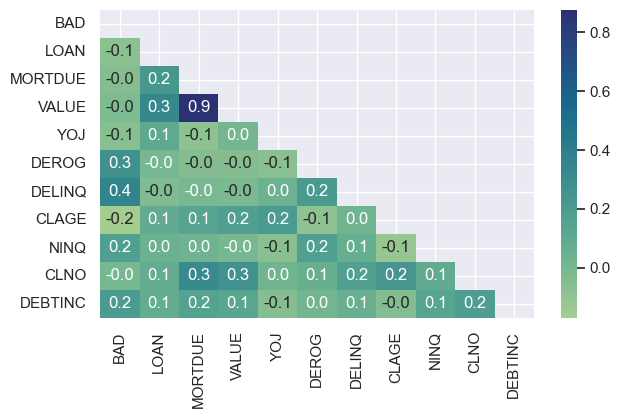

In [ ]:
plt.figure(figsize=(7,4))
corr=data[num_col].corr()
map=np.triu(corr)
sns.heatmap(data[num_col].corr(), annot=True, fmt=".1f", cmap="crest", mask=map)
plt.show()

**Observation**: *Correlations are not very strong (neither in a positive or negative way (range from -0.2 to 0.4) with one exception (below).*
- **Target variable: BAD**:
    - Strong Positive correlations with DELINQ and DEROG values (0.4 and 0.3 respectively) showing that there is a relationship between default (BAD=1) and the number of major derogatory reports and delinquent credit lines;
    - Positive correlations between default (BAD) and the nb of recent credit inquiries (NINQ) and the debt ratio (DEBTINC) (both variables at 0.2)
    - Negative correlation between default and the age of the oldest credit line (CLAGE: -0.2), meaning that defaulting clients tend to have younger credit lines;
    - Other relations are weakly negative (-0.1).
    
- **Second variable of interest: DEBTINC**: keep in mind that we have a lot of missing data. Nonetheless, on the accessible data we note positive correlations (0.2) with:
    - BAD: higher the debt ratio, the higher the risk of defaulting;
    - MORTDUE: the higher the debt ratio, the more money owed to the bank;
    - CLNO: the higher the debt ratio, the higher the number of credit lines.

- **Stronger positive correlations** (0.3 and above)
    - Strongest correlation: VALUE of the property and MORTDUE (amount of moeny owed to the bank) at 0.9. This link is expected as the higher the property value, the higher the expected MORTDUE. However an interesting point is that such a positive correlation is not visible between VALUE-MORTDUE and LOAN (only 0.2 and 0.3).
    - CLNO-MORTDUE (0.3) and CLNO-VALUE (0.3): seems to reflect that there is a correlation between the value of the property and the debt credited by the client (number of credit lines CLNO and ttl owed with MORTDUE).

- **Weaker positive correlations(0.2 and lower)**
    - CLAGE-VALUE : the higher the property value, the older the age of the oldest credit line;
    - CLAGE-CLNO : the older the oldest credit line, the higher the number of credit lines;
    - DELINQ-DEROG: the higher the number of delinquent credit lines, the higher the number of derogatory reports;
    - DELINQ-CLNO : the higher the number of delinquent credit lines, th higher the number of existing credit lines.

**Numerical Variables - Correlation visualisation**
To explore these correlations further, we will: bin the data and visualise the risk level (BAD proportion in each variable sub-group).

In [ ]:
#Copy the dataset to create bins and facilitate the visualisation
dt_bins=dt.copy()

In [ ]:
#Bining LOAN
bins = [0, 5000, 10000, 15000, 20000, 25000, np.inf]
names = ['<5000', '5000-1000', '10000-15000', '15000-20000','20000-25000', '25000+']

dt_bins['LOAN'] = pd.cut(dt_bins['LOAN'], bins, labels=names, right=False)
dt_bins['LOAN'] = dt_bins['LOAN'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining MORTDUE
bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
names = ['<20000', '20000-40000', '40000-60000', '60000-80000','80000-100000', '100000+']

dt_bins['MORTDUE'] = pd.cut(dt_bins['MORTDUE'], bins, labels=names, right=False)
dt_bins['MORTDUE'] = dt_bins['MORTDUE'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining VALUE
bins = [0, 50000, 100000, 150000, 200000, 250000, np.inf]
names = ['<50000', '50000-100000', '100000-150000', '150000-200000','200000-250000', '250000+']

dt_bins['VALUE'] = pd.cut(dt_bins['VALUE'], bins, labels=names, right=False)
dt_bins['VALUE'] = dt_bins['VALUE'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining YOJ
bins = [0, 3, 6, 9, 12, 15, np.inf]
names = ['<3', '3-6', '6-9', '9-12', '12,15', '15+']

dt_bins['YOJ'] = pd.cut(dt_bins['YOJ'], bins, labels=names, right=False)
dt_bins['YOJ'] = dt_bins['YOJ'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining DEROG
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.inf]
names = ['<1', '1-2', '2-3', '3-4','4-5','5-6', '6-7', '7-8', '8-9', '9-10', '10+']

dt_bins['DEROG'] = pd.cut(dt_bins['DEROG'], bins, labels=names, right=False)
dt_bins['DEROG'] = dt_bins['DEROG'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining DELINQ
bins = [0, 2, 4, 6, 8, 10, 12, 14, np.inf]
names = ['<2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14+']

dt_bins['DELINQ'] = pd.cut(dt_bins['DELINQ'], bins, labels=names, right=False)
dt_bins['DELINQ'] = dt_bins['DELINQ'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining CLAGE
bins = [0, 50, 100, 150, 200, 250, np.inf]
names = ['<50', '50-10', '100-150', '150-200','200-250', '250+']

dt_bins['CLAGE'] = pd.cut(dt_bins['CLAGE'], bins, labels=names, right=False)
dt_bins['CLAGE'] = dt_bins['CLAGE'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining NINQ
bins = [0, 0.5, 1, 1.5, 2, 2.5,3, np.inf]
names = ['<0.5', '0.5-1', '1-1.5', '1.5-2','2-2.5', '2.5-3','3+']

dt_bins['NINQ'] = pd.cut(dt_bins['NINQ'], bins, labels=names, right=False)
dt_bins['NINQ'] = dt_bins['NINQ'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining CLNO
bins = [0, 5, 10, 15, 20, 25,30, np.inf]
names = ['<5', '5-10', '10-15', '15-20','20-25', '25-30','30+']

dt_bins['CLNO'] = pd.cut(dt_bins['CLNO'], bins, labels=names, right=False)
dt_bins['CLNO'] = dt_bins['CLNO'].cat.reorder_categories(names, ordered=True)

In [ ]:
#Bining DEBTINC
bins = [0, 10, 20, 30, 40, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40+']

dt_bins['DEBTINC'] = pd.cut(dt_bins['DEBTINC'], bins, labels=names, right=False)
dt_bins['DEBTINC'] = dt_bins['DEBTINC'].cat.reorder_categories(names, ordered=True)

#### **Bivariate Analysis - Visualisation of categorical and Numerical Variables vis-à-vis dependent variable (BAD)**

In [ ]:
#Graph function
def biv_hist(col):
  title=title_graph(col)
  color_map={0:"darkblue", 1:"darkseagreen"}
  fig=px.histogram(dt_bins,x=col, color="BAD", barmode="stack", nbins=10, opacity=0.6, color_discrete_map=color_map, text_auto=True, title=title)
  fig.update_traces(textposition='outside')
  fig.update_layout(height=600, width=600, bargap=0.05, title=dict(text=title, x=0.5, xanchor="center", font=dict(size=24)))
  fig.show()

In [ ]:
#Table function
from tabulate import tabulate
def key_feat(col,head):
  breakdown=(dt_bins.groupby(col)["BAD"].value_counts(normalize=True)*100).unstack().fillna(0)
  breakdown=breakdown.sort_index()
  key_feat_subs= breakdown[1].sort_values(ascending=False).head(head)
  key_feat_df = key_feat_subs.reset_index()
  key_feat_df.columns = [col, '% of defaulters (BAD=1)']
  table = tabulate(key_feat_df, headers='keys', tablefmt='fancy_grid', showindex=False)

  print(table)

In [ ]:
biv_hist("LOAN")
print("Percentage of Default per category")
key_feat("LOAN", 10)

Percentage of Default per category
╒═════════════╤═══════════════════════════╕
│ LOAN        │   % of defaulters (BAD=1) │
╞═════════════╪═══════════════════════════╡
│ <5000       │                   57.6389 │
├─────────────┼───────────────────────────┤
│ 5000-1000   │                   24.2394 │
├─────────────┼───────────────────────────┤
│ 10000-15000 │                   19.6828 │
├─────────────┼───────────────────────────┤
│ 15000-20000 │                   18.3871 │
├─────────────┼───────────────────────────┤
│ 25000+      │                   18.1672 │
├─────────────┼───────────────────────────┤
│ 20000-25000 │                   14.5985 │
╘═════════════╧═══════════════════════════╛


In [ ]:
biv_hist("MORTDUE")
print("Percentage of Default per category")
key_feat("MORTDUE", 10)

Percentage of Default per category
╒══════════════╤═══════════════════════════╕
│ MORTDUE      │   % of defaulters (BAD=1) │
╞══════════════╪═══════════════════════════╡
│ <20000       │                   26.8139 │
├──────────────┼───────────────────────────┤
│ 20000-40000  │                   26.4205 │
├──────────────┼───────────────────────────┤
│ 40000-60000  │                   19.8198 │
├──────────────┼───────────────────────────┤
│ 60000-80000  │                   19.2897 │
├──────────────┼───────────────────────────┤
│ 100000+      │                   18.1308 │
├──────────────┼───────────────────────────┤
│ 80000-100000 │                   14.7436 │
╘══════════════╧═══════════════════════════╛


In [ ]:
biv_hist("VALUE")
print("Percentage of Default per category")
key_feat("VALUE", 10)

Percentage of Default per category
╒═══════════════╤═══════════════════════════╕
│ VALUE         │   % of defaulters (BAD=1) │
╞═══════════════╪═══════════════════════════╡
│ <50000        │                   31.4103 │
├───────────────┼───────────────────────────┤
│ 200000-250000 │                   21.3198 │
├───────────────┼───────────────────────────┤
│ 250000+       │                   20.1493 │
├───────────────┼───────────────────────────┤
│ 50000-100000  │                   17.4974 │
├───────────────┼───────────────────────────┤
│ 100000-150000 │                   16.1426 │
├───────────────┼───────────────────────────┤
│ 150000-200000 │                   14.2857 │
╘═══════════════╧═══════════════════════════╛


In [ ]:
biv_hist("YOJ")
print("Percentage of Default per category")
key_feat("YOJ", 10)

Percentage of Default per category
╒═══════╤═══════════════════════════╕
│ YOJ   │   % of defaulters (BAD=1) │
╞═══════╪═══════════════════════════╡
│ 3-6   │                   24.2304 │
├───────┼───────────────────────────┤
│ <3    │                   24.0935 │
├───────┼───────────────────────────┤
│ 12,15 │                   22.6667 │
├───────┼───────────────────────────┤
│ 9-12  │                   19.2612 │
├───────┼───────────────────────────┤
│ 15+   │                   16.9124 │
├───────┼───────────────────────────┤
│ 6-9   │                   16.5072 │
╘═══════╧═══════════════════════════╛


In [ ]:
biv_hist("DEROG")
print("Percentage of Default per category")
key_feat("DEROG", 10)

Percentage of Default per category
╒═════════╤═══════════════════════════╕
│ DEROG   │   % of defaulters (BAD=1) │
╞═════════╪═══════════════════════════╡
│ 7-8     │                  100      │
├─────────┼───────────────────────────┤
│ 8-9     │                  100      │
├─────────┼───────────────────────────┤
│ 9-10    │                  100      │
├─────────┼───────────────────────────┤
│ 10+     │                  100      │
├─────────┼───────────────────────────┤
│ 4-5     │                   78.2609 │
├─────────┼───────────────────────────┤
│ 3-4     │                   74.1379 │
├─────────┼───────────────────────────┤
│ 6-7     │                   66.6667 │
├─────────┼───────────────────────────┤
│ 2-3     │                   51.25   │
├─────────┼───────────────────────────┤
│ 5-6     │                   46.6667 │
├─────────┼───────────────────────────┤
│ 1-2     │                   38.8506 │
╘═════════╧═══════════════════════════╛


**Note for the Corrector: I had an issue with the code using the function - I raised a ticket but in the mean time I made a separate function fro DELINQ and CLAGE.**

In [ ]:
  title=title_graph("DELINQ")
  color_map={0:"darkblue", 1:"darkseagreen"}
  fig=px.histogram(dt,x="DELINQ", color="BAD", barmode="stack", nbins=10, opacity=0.6, color_discrete_map=color_map, text_auto=True, title=title)
  fig.update_traces(textposition='outside')
  fig.update_layout(height=600, width=600, bargap=0.05, title=dict(text=title, x=0.5, xanchor="center", font=dict(size=24)))
  fig.show()

print("Percentage of Default per category")
key_feat("DELINQ", 10)

Percentage of Default per category
╒══════════╤═══════════════════════════╕
│ DELINQ   │   % of defaulters (BAD=1) │
╞══════════╪═══════════════════════════╡
│ 6-8      │                  100      │
├──────────┼───────────────────────────┤
│ 8-10     │                  100      │
├──────────┼───────────────────────────┤
│ 10-12    │                  100      │
├──────────┼───────────────────────────┤
│ 12-14    │                  100      │
├──────────┼───────────────────────────┤
│ 14+      │                  100      │
├──────────┼───────────────────────────┤
│ 4-6      │                   66.3793 │
├──────────┼───────────────────────────┤
│ 2-4      │                   48.285  │
├──────────┼───────────────────────────┤
│ <2       │                   16.6563 │
╘══════════╧═══════════════════════════╛


In [ ]:
title=title_graph("CLAGE")
color_map={0:"darkblue", 1:"darkseagreen"}
fig=px.histogram(dt,x="CLAGE", color="BAD", barmode="stack", nbins=10, opacity=0.6, color_discrete_map=color_map, text_auto=True, title=title)
fig.update_traces(textposition='outside')
fig.update_layout(height=600, width=600, bargap=0.05, title=dict(text=title, x=0.5, xanchor="center", font=dict(size=24)))
fig.show()

print("Percentage of Default per category")
key_feat("CLAGE", 10)

Percentage of Default per category
╒═════════╤═══════════════════════════╕
│ CLAGE   │   % of defaulters (BAD=1) │
╞═════════╪═══════════════════════════╡
│ <50     │                   47.8261 │
├─────────┼───────────────────────────┤
│ 50-10   │                   28.7879 │
├─────────┼───────────────────────────┤
│ 100-150 │                   25.3237 │
├─────────┼───────────────────────────┤
│ 150-200 │                   16.8874 │
├─────────┼───────────────────────────┤
│ 200-250 │                   14.3574 │
├─────────┼───────────────────────────┤
│ 250+    │                   10.1382 │
╘═════════╧═══════════════════════════╛


In [ ]:
biv_hist("NINQ")
print("Percentage of Default per category")
key_feat("NINQ", 10)

Percentage of Default per category
╒════════╤═══════════════════════════╕
│ NINQ   │   % of defaulters (BAD=1) │
╞════════╪═══════════════════════════╡
│ 3+     │                   35.375  │
├────────┼───────────────────────────┤
│ 2-2.5  │                   23.2051 │
├────────┼───────────────────────────┤
│ 1-1.5  │                   18.9694 │
├────────┼───────────────────────────┤
│ <0.5   │                   15.646  │
├────────┼───────────────────────────┤
│ 0.5-1  │                    0      │
├────────┼───────────────────────────┤
│ 1.5-2  │                    0      │
├────────┼───────────────────────────┤
│ 2.5-3  │                    0      │
╘════════╧═══════════════════════════╛


In [ ]:
biv_hist("CLNO")
print("Percentage of Default per category")
key_feat("CLNO", 10)

Percentage of Default per category
╒════════╤═══════════════════════════╕
│ CLNO   │   % of defaulters (BAD=1) │
╞════════╪═══════════════════════════╡
│ <5     │                   43.3962 │
├────────┼───────────────────────────┤
│ 5-10   │                   27.1144 │
├────────┼───────────────────────────┤
│ 30+    │                   22.4023 │
├────────┼───────────────────────────┤
│ 25-30  │                   18.6136 │
├────────┼───────────────────────────┤
│ 10-15  │                   18.0985 │
├────────┼───────────────────────────┤
│ 20-25  │                   17.652  │
├────────┼───────────────────────────┤
│ 15-20  │                   16.3137 │
╘════════╧═══════════════════════════╛


In [ ]:
biv_hist("DEBTINC")
print("Percentage of Default per category")
key_feat("DEBTINC", 10)

Percentage of Default per category
╒═══════════╤═══════════════════════════╕
│ DEBTINC   │   % of defaulters (BAD=1) │
╞═══════════╪═══════════════════════════╡
│ <10       │                  37.5     │
├───────────┼───────────────────────────┤
│ 40+       │                  19.0157  │
├───────────┼───────────────────────────┤
│ 30-40     │                   6.56875 │
├───────────┼───────────────────────────┤
│ 10-20     │                   5.42169 │
├───────────┼───────────────────────────┤
│ 20-30     │                   4.43478 │
╘═══════════╧═══════════════════════════╛


In [ ]:
biv_hist("REASON")
print("Percentage of Default per category")
key_feat("REASON", 10)

Percentage of Default per category
╒══════════╤═══════════════════════════╕
│ REASON   │   % of defaulters (BAD=1) │
╞══════════╪═══════════════════════════╡
│ HomeImp  │                   22.2472 │
├──────────┼───────────────────────────┤
│ DebtCon  │                   18.9664 │
╘══════════╧═══════════════════════════╛


#### **Mutivariate Analysis**

To improve readibility of the pairplot, we have selected only the numerical varibales, and placed on the x axis the features that seem to represent a stronger correlation with default, as identified in the correlation heatmap (DEORG and DELINC). We also add DEBTINC as such is identified in the problem statement as a feature of specific interest for the banks.

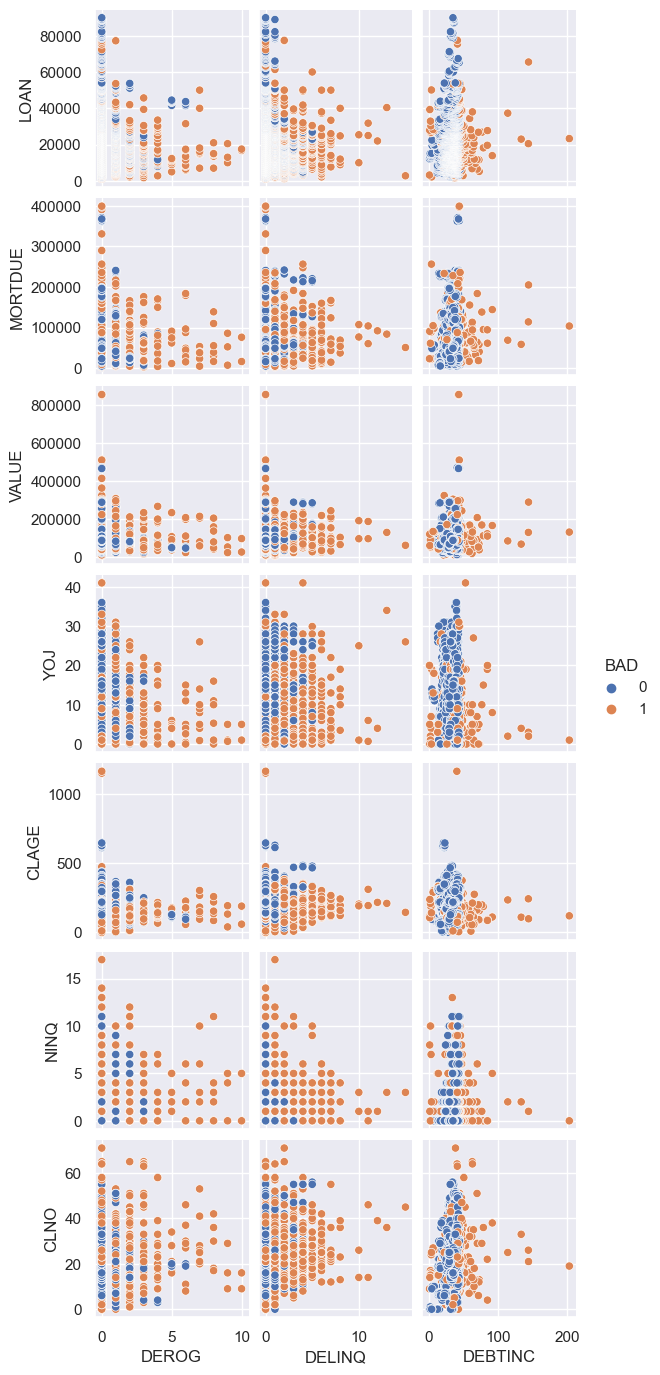

In [ ]:
sns.pairplot(dt, hue="BAD", x_vars=['DEROG','DELINQ', 'DEBTINC'], y_vars=["LOAN", "MORTDUE", 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO'],height=2)

## *Guiding questions and EDA conclusions*

**Observation**:

**Numerical variables - default risk level**

- **LOAN**: Absolute numbers: 10k-15k highest risk followed by 5k-10k, however in relative terms, the <5k amounts have the highest default rate by far, reaching 57.2%, followed by the 5k-10k with 25.1% and the 10k-15k with a 20.5% default rate.
- **MORTDUE**: Absolute numbers: 40k-60k and 60k-80k represent the highest risk. In relative terms, we also note that the lowest amounts represent the highest default rates with <20k at 27.4%, followed by 20-40k (26.6%), and with the 40-60k and 60-80k representing respectively 19.7% and 19.2% default rates, while the highest brackets (from 80k-100k onward) represents the lowest default rate at 14.8 we note an increase at above 100k (18.1%).
- **VALUE**: Absolute numbers: 50k-100k represent the highest risk, however in relative terms, we note a comparable trend with the lowest value representing the highest relative risk with <50k holding a 31.8% default rate. Interestingly, we note the the highest value (250k+) represents the second highest default rate at 20.3%, followed by the second highest value 200-250k at 19.7% default rate.
- **YOJ** : Both in absolute and relative terms the lowest YOJ categories represent the highest risks with <5 years leading the way on both terms, and reaching a 28.3% default rate, followed by the 10-15 years with a 21.6% default rate.
- **DEROG**: Absolute numbers: lowest figures represent the highest risk by far with <1, and 1-2 leading the way. In relative numbers however, we note that highest rangers hold very high risk levels: from 6-10 the categories hold a 100% default rate, followed by 3-4 at 78.3%, 2-3 at 74.1%. <1 “only” represents 38.9% default rate, while it reaches 51.3% for 1-2. Nonetheless, we note that the default rates are very high for all categories.
- **DELINQ**: in Relative terms, we note that above from 6-max, the default rate reaches 100%. The 4-6 range represents also a high default rate (89.2%), while default risk decreases for lower values. Nonetheless, the risk remains high as the minimum value is 36.9%.
- **CLAGE**: Relative numbers: lower values have the highest risk with <50 and 50-10 reaching, respectively, 46.9% and 28.8% default rates.
- **NINQ**: Absolute terms: higher risk is for the lower categories (0.5-1 and 1.5-2), however this trend is not present in relative terms, where the highest risk lays with higher brackets: 3+ (43.1% default rate), 2.5-3 (27.3%)
- **CLNO**: In absolute numbers, the highest risk are present amongst the 15-20, 30+, and 20-25 brackets. In absolute numbers however, the lowest figures represent the highest relative risks, with <5 reaching 43.4% default rate, and 5-10 a 23.3% default rate.
- **DEBTINC**: Absolute numbers, the highest risk is present with the highest value bracket (40+, representing the Q3-max value), the second highest risk in absolute numbers is the 30-40 bracket. In relative numbers however, the highest risk is present with the lowest bracket <10 reaching 37.5% default rate, followed by the 40+ with 19% default rate risk.

**Categorical variables - default risk level**

Very interestingly, we note, through the % analysis that:
- the **Home Improvement** loans represent a higher risk, with 22.25% default rate, as opposed to 18.96% for the debt consolidation loans
- the **professions with the higher risks are Sales and Self-employed** with 34.86% and 30.05% default rates respectively. The safest professions are "ProfExe" and "Office" with 16.51 and 13.18 defautl rates respectively.

# Model Building

## *Data Preparation*

### **Treating Outliers**

During our EDA, we noted that a lot of features have outliers, however such have varying densities (cf boxplots above).
In order to limit the bias on the model, we will treat the outliers following the said logic:
- **sparse outliers** (individual dots visible on the boxplots) will be immediately treated and attached to their closest Q value -- YOJ, NINQ, CLNO
- **numerous outliers** (dense dot-line on the boxplots), will be treated at a later stage, as part of the model tuning, in order to first evaluate the importance of the said features, before changing the data composing them.-- MORTDUE, VALUE, CLAGE, LOAN.

As demonstrated in the EDA, it appears that for a number of variables, some sub-groups (bins) represent a higher relative risk than others. These sub-groups, as they represent a minority, are at a higher risk of being located outside Q1-Q3, and treating the outliers at this stage would erase these important details from the model building.


- some variables, evaluated as **potential key features** will remain as such: DEBTINQ, DEROG, DELINQ

In [ ]:
def outliers(col):
    Q1 = dt[col].quantile(0.25)
    Q3 = dt[col].quantile(0.75)
    IQR = Q3 - Q1
    min_value=Q1 - 1.5*IQR
    max_value=Q3 + 1.5*IQR
    dt[col]=dt[col].clip(lower=min_value, upper=max_value)
    return dt

In [ ]:
outliers("YOJ")
outliers("NINQ")
outliers("CLNO")

BAD   LOAN   MORTDUE      VALUE  REASON  JOB    YOJ  DEROG  DELINQ  \
0       1   1100 25860.000  39025.000       0    0 10.500  0.000   0.000   
1       1   1300 70053.000  68400.000       0    0  7.000  0.000   2.000   
2       1   1500 13500.000  16700.000       0    0  4.000  0.000   0.000   
3       1   1500 65019.000  89235.500       1    0  7.000  0.000   0.000   
4       0   1700 97800.000 112000.000       0    1  3.000  0.000   0.000   
...   ...    ...       ...        ...     ...  ...    ...    ...     ...   
5955    0  88900 57264.000  90185.000       1    0 16.000  0.000   0.000   
5956    0  89000 54576.000  92937.000       1    0 16.000  0.000   0.000   
5957    0  89200 54045.000  92924.000       1    0 15.000  0.000   0.000   
5958    0  89800 50370.000  91861.000       1    0 14.000  0.000   0.000   
5959    0  89900 48811.000  88934.000       1    0 15.000  0.000   0.000   

       CLAGE  NINQ   CLNO  DEBTINC  
0     94.367 1.000  9.000   34.818  
1    121.833 0.000 14.000   34.818  
2    149.467 1.000 10.000   34.818  
3    173.467 1.000 20.000   34.818  
4     93.333 0.000 14.000   34.818  
...      ...   ...    ...      ...  
5955 221.809 0.000 16.000   36.112  
5956 208.692 0.000 15.000   35.860  
5957 212.280 0.000 15.000   35.557  
5958 213.893 0.000 16.000   34.341  
5959 219.601 0.000 16.000   34.572  

[5960 rows x 13 columns]

### **Treating Missing Values**

As previously reflected in the EDA, most variables present missing values. As the proportion of NaN remains reasonable (from 1 to 21% of total rows), we will proceed with replacing the NaN by the median value, for numerical data, and by the mode, for categorical data.


In [ ]:
def fill_na_num(col):
    median=dt[col].median()
    dt[col].fillna(median, inplace=True)
    return dt

In [ ]:
#Filling missing numerical values with mean
fill_na_num("MORTDUE")
fill_na_num("VALUE")
fill_na_num("YOJ")
fill_na_num("DEROG")
fill_na_num("DELINQ")
fill_na_num("CLAGE")
fill_na_num("NINQ")
fill_na_num("CLNO")
fill_na_num("DEBTINC")


BAD   LOAN   MORTDUE      VALUE  REASON  JOB    YOJ  DEROG  DELINQ  \
0       1   1100 25860.000  39025.000       0    0 10.500  0.000   0.000   
1       1   1300 70053.000  68400.000       0    0  7.000  0.000   2.000   
2       1   1500 13500.000  16700.000       0    0  4.000  0.000   0.000   
3       1   1500 65019.000  89235.500       1    0  7.000  0.000   0.000   
4       0   1700 97800.000 112000.000       0    1  3.000  0.000   0.000   
...   ...    ...       ...        ...     ...  ...    ...    ...     ...   
5955    0  88900 57264.000  90185.000       1    0 16.000  0.000   0.000   
5956    0  89000 54576.000  92937.000       1    0 16.000  0.000   0.000   
5957    0  89200 54045.000  92924.000       1    0 15.000  0.000   0.000   
5958    0  89800 50370.000  91861.000       1    0 14.000  0.000   0.000   
5959    0  89900 48811.000  88934.000       1    0 15.000  0.000   0.000   

       CLAGE  NINQ   CLNO  DEBTINC  
0     94.367 1.000  9.000   34.818  
1    121.833 0.000 14.000   34.818  
2    149.467 1.000 10.000   34.818  
3    173.467 1.000 20.000   34.818  
4     93.333 0.000 14.000   34.818  
...      ...   ...    ...      ...  
5955 221.809 0.000 16.000   36.112  
5956 208.692 0.000 15.000   35.860  
5957 212.280 0.000 15.000   35.557  
5958 213.893 0.000 16.000   34.341  
5959 219.601 0.000 16.000   34.572  

[5960 rows x 13 columns]

In [ ]:
#Filling categorical missing values with mode
def fill_na_cat(col):
    mode=dt[col].mode()[0]
    dt[col].fillna(mode,inplace=True)
    return dt

In [ ]:
fill_na_cat("REASON")
fill_na_cat("JOB")

BAD   LOAN   MORTDUE      VALUE  REASON  JOB    YOJ  DEROG  DELINQ  \
0       1   1100 25860.000  39025.000       0    0 10.500  0.000   0.000   
1       1   1300 70053.000  68400.000       0    0  7.000  0.000   2.000   
2       1   1500 13500.000  16700.000       0    0  4.000  0.000   0.000   
3       1   1500 65019.000  89235.500       1    0  7.000  0.000   0.000   
4       0   1700 97800.000 112000.000       0    1  3.000  0.000   0.000   
...   ...    ...       ...        ...     ...  ...    ...    ...     ...   
5955    0  88900 57264.000  90185.000       1    0 16.000  0.000   0.000   
5956    0  89000 54576.000  92937.000       1    0 16.000  0.000   0.000   
5957    0  89200 54045.000  92924.000       1    0 15.000  0.000   0.000   
5958    0  89800 50370.000  91861.000       1    0 14.000  0.000   0.000   
5959    0  89900 48811.000  88934.000       1    0 15.000  0.000   0.000   

       CLAGE  NINQ   CLNO  DEBTINC  
0     94.367 1.000  9.000   34.818  
1    121.833 0.000 14.000   34.818  
2    149.467 1.000 10.000   34.818  
3    173.467 1.000 20.000   34.818  
4     93.333 0.000 14.000   34.818  
...      ...   ...    ...      ...  
5955 221.809 0.000 16.000   36.112  
5956 208.692 0.000 15.000   35.860  
5957 212.280 0.000 15.000   35.557  
5958 213.893 0.000 16.000   34.341  
5959 219.601 0.000 16.000   34.572  

[5960 rows x 13 columns]

In [ ]:
dt.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### **Categories Encoding**

In [ ]:
dt.REASON=pd.factorize(dt.REASON)[0]
dt.JOB=pd.factorize(dt.JOB)[0]
dt.sample(10)

BAD   LOAN    MORTDUE      VALUE  REASON  JOB    YOJ  DEROG  DELINQ  \
3734    0  19800  56745.000  83146.000       1    0 11.000  0.000   0.000   
2061    0  13000  77355.000 114400.000       1    0  7.000  0.000   0.000   
2349    1  14200  68750.000  88627.000       1    0 10.000  0.000   1.000   
2654    0  15200 137128.000 184660.000       1    3 11.000  0.000   0.000   
736     0   8200  79751.000 125413.000       0    0  7.000  0.000   0.000   
842     0   8700  54768.000  87268.000       0    0 18.000  0.000   0.000   
2033    0  13000  96172.000 112123.000       1    4 14.000  0.000   0.000   
2412    0  14500  49348.000  68000.000       1    1  0.200  0.000   0.000   
2170    0  13500 109258.000 126101.000       1    0  2.000  0.000   0.000   
170     0   5000  65019.000  26550.000       1    0  1.700  0.000   0.000   

       CLAGE  NINQ   CLNO  DEBTINC  
3734  85.254 0.000 10.000    7.862  
2061 173.467 1.000 20.000   34.818  
2349 219.673 0.000 32.000   34.640  
2654 254.356 0.000 21.000   28.815  
736  173.467 1.000 20.000   41.986  
842  187.581 0.000 28.000   26.367  
2033 181.892 1.000 18.000   36.226  
2412 178.600 0.000 25.000   34.818  
2170 130.777 1.000 25.000   33.540  
170  276.967 1.000 14.000   34.818

## *Logistic Regression*

### **Scaling  Data**


In [ ]:
dt_1=dt.copy() # make a copy to try different scaling methods

scaler=StandardScaler()
scaled_features = scaler.fit_transform(dt_1.drop("BAD", axis=1))

scaled_data = pd.DataFrame(scaled_features, columns=dt_1.drop("BAD", axis=1).columns)
scaled_data["BAD"] = dt_1["BAD"]


In [ ]:
#Train-Test Split
x_1=scaled_data.drop("BAD",axis=1)
y_1=scaled_data["BAD"]

x1_train, x1_test,y1_train, y1_test=train_test_split(x_1,y_1,test_size=0.2, random_state=1)

### **Linear Model Performance Metrics**

In [ ]:
def adj_r2_score(predictors, targets, predictions):
    r2=r2_score(targets, predictions)
    n=predictors.shape[0]
    k=predictors.shape[1]
    return 1 - ((1-r2)*(n-1)/(n-k-1))

def mape_score(targets, predictions):
    return np.abs(np.abs(targets - predictions)/targets)*100

def model_performance_regression (model, predictors, target):
    pred=model.predict(predictors)
    r2=r2_score(target, pred)
    adjr2=adj_r2_score(predictors, target,pred)
    rmse=np.sqrt(mean_squared_error(target,pred))
    mae=mean_absolute_error(target,pred)
    mape=mape_score(target,pred)

    df_perf=pd.DataFrame({"RMSE":rmse, "MAE":mae, "R-Squared":r2, "Adj. R-Squared":adjr2, "MAPE":mape,}, index=[0],)
    return df_perf

### **Model Building - Logistic Regression**

In [ ]:
log=LogisticRegression()
log.fit(x1_train, y1_train)

LogisticRegression()

In [ ]:
y_train_pred_log=log.predict(x1_train)
mape_score(y1_train, y_train_pred_log)

5292   0.000
1162     NaN
2355     NaN
3620     NaN
1247     NaN
        ... 
905    0.000
5192     NaN
3980     NaN
235      NaN
5157     NaN
Name: BAD, Length: 4768, dtype: float64

In [ ]:
y_test_pred_log=log.predict(x1_test)
mape_score(y1_test, y_test_pred_log)

4146   0.000
4103     NaN
5439     NaN
997      NaN
5908     NaN
        ... 
4171     NaN
100    0.000
5164     NaN
5208     NaN
4538     NaN
Name: BAD, Length: 1192, dtype: float64

In [ ]:
log_test= model_performance_regression(tree, x1_test, y1_test)
log_test

RMSE   MAE  R-Squared  Adj. R-Squared  MAPE
0 0.890 0.792     -3.806          -3.855   NaN

**Observations**: the model is performing interestingly poorly as per the indicators. We note a high number of missing values, which might impact the perfomance, however suspect that quite a lot fo work would be requested to improve performance (mobilising PCA and KNN amongst others).

However, we are convinced that Decision Tree, Random Forest and other models should be able to provide good results with limited computational needs, and while ensuring a degree of readability for the user.

We would suggest moving on to the Decision Tree model.

## *Decision Tree Classifier*

**Encoded Data Train-Test Split**

In [ ]:
x=dt.drop(["BAD"], axis=1)
y=dt["BAD"]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)

In [ ]:
print("Shape of the training data: ", x_train.shape)
print("Shape of the test data: ", x_test.shape)

Shape of the training data:  (4172, 12)
Shape of the test data:  (1788, 12)


**Non-linear Model Performance Metrics**

In [ ]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted))
  cm=confusion_matrix (actual, predicted)
  plt.figure(figsize=(4,4))
  sns.heatmap(cm, annot=True, fmt="-2f", xticklabels=["Non-Default", "Default"], yticklabels=["Non-Default", "Default"])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show

In [ ]:
def model_performance_classification (model, predictors, target):
  pred = model.predict(predictors)
  recall = recall_score(target,pred,average="macro")
  precision = precision_score(target,pred,average="macro")
  acc = accuracy_score(target,pred)

  #Create Dataframe Metrics
  df_perf=pd.DataFrame({"Precision":precision, "Recall":recall, "Accuracy":acc,}, index=[0],)
  return df_perf

## *Decision Tree Classifier*
The problem we are aiming to solve, namely identifying wether clients are likely to default or not on their loan, is inherently a classification problem. We will therefore use a Decision Tree Classifier, along with Randomf Forest Classifier models.

**Dataset imbalance**: BAD=1 only represents 19.94% of our overall dataset. To avoid any bia, we wll tune the class-weight hyperparameter from the beginning to avoid any bias (rounding 19.94 to 20).

In [ ]:
tree=DecisionTreeClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



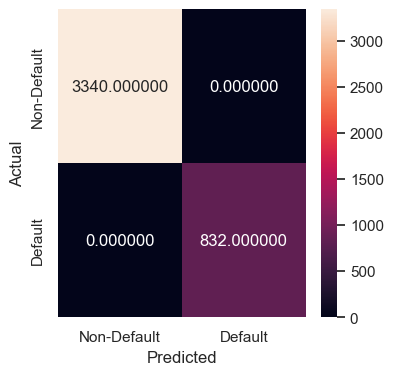

In [ ]:
y_train_pred_tree=tree.predict(x_train)
metrics_score(y_train, y_train_pred_tree)

Pure overfitting: the model is projecting 100% across the board. Let's go to the test data to confirm.

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.70      0.64      0.67       357

    accuracy                           0.87      1788
   macro avg       0.81      0.79      0.80      1788
weighted avg       0.87      0.87      0.87      1788



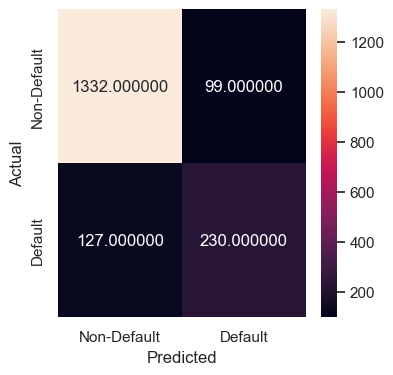

In [ ]:
y_test_pred_tree=tree.predict(x_test)
metrics_score(y_test, y_test_pred_tree)

In [ ]:
dtree_test= model_performance_classification(tree, x_test, y_test)
dtree_test

Precision  Recall  Accuracy
0      0.806   0.788     0.874

**Observations**: the model is vastly overfiting as we note that:
- Recall: falls from 1 to 0.788
- Precision: falls from 1 to 0.806
- Accuracy: falls from 1 to 0.874
Although too low, the results seem encouraging for an un-tuned model.

**Decision Tree - Visualisation**

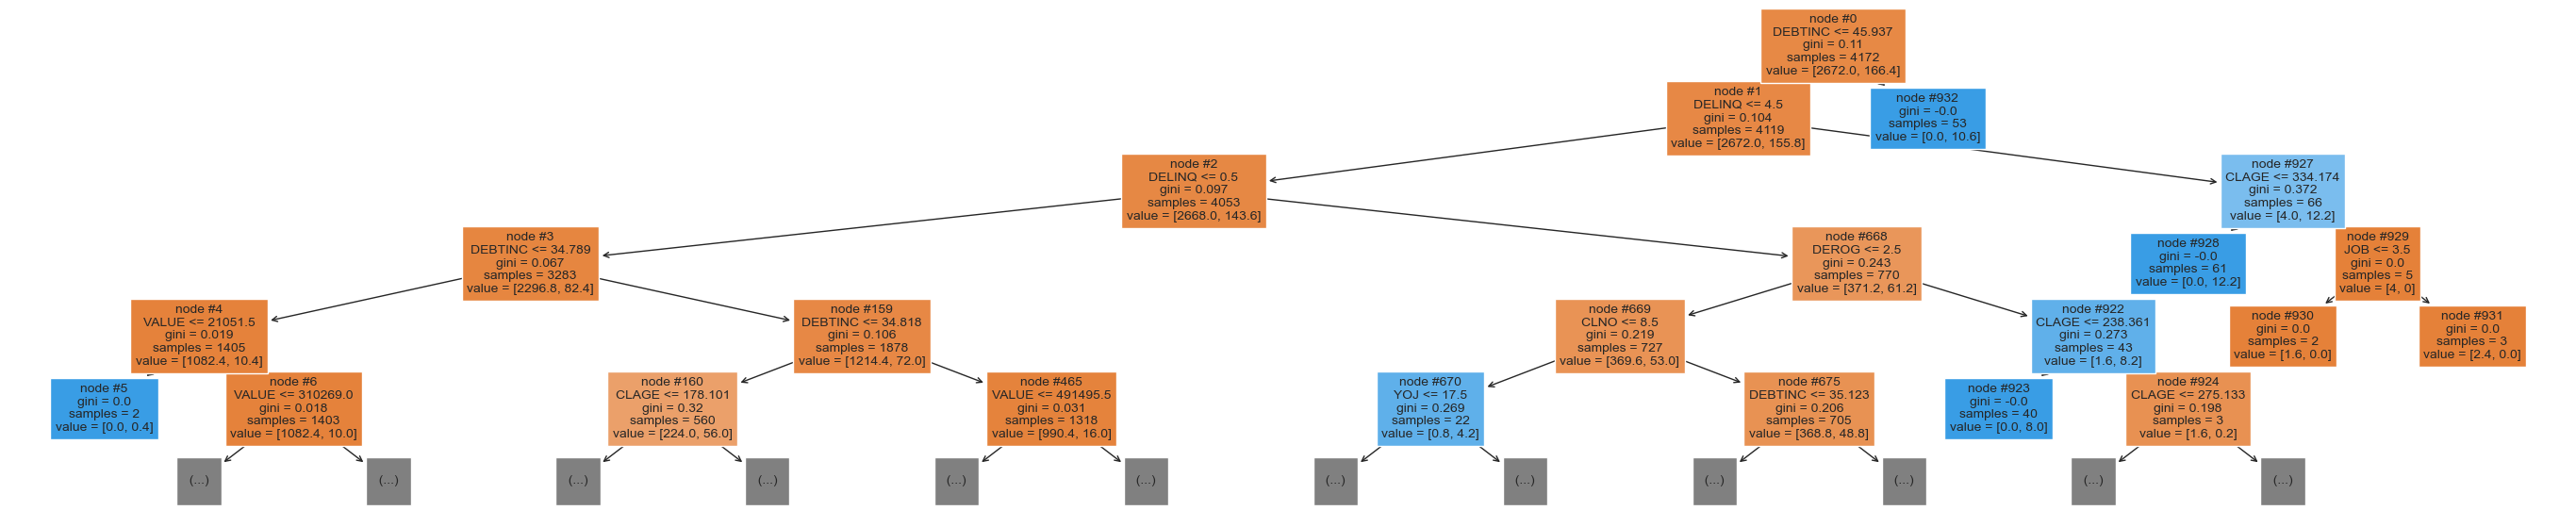

In [ ]:
from sklearn.tree import plot_tree
features=list(x.columns)
plt.figure(figsize=(35,7
                ))
plot_tree(tree, max_depth=5, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=None)
plt.show()

**Observations**
- **key importance of DEBTINC and CLAGE features** as these two suffice to identify defaulting clients at only 2 levels. This path is defined as follows: **DEBTINC is above 45.937**, **CLAGE <= 334.174**
- weaker path (in 6 levels): DEBTINC above 45.937, DELINQ <= 4.5 and 0.5, DEBTINC <= 34.789. VALUE <= 21051.5
- a number of other path seem to exist, however such cannot be visualised due to the chosen depth of the tree.

Thereore, we will resort to visualising the important features.

Text(0.5, 1.0, 'Feature Importance Decision Tree')

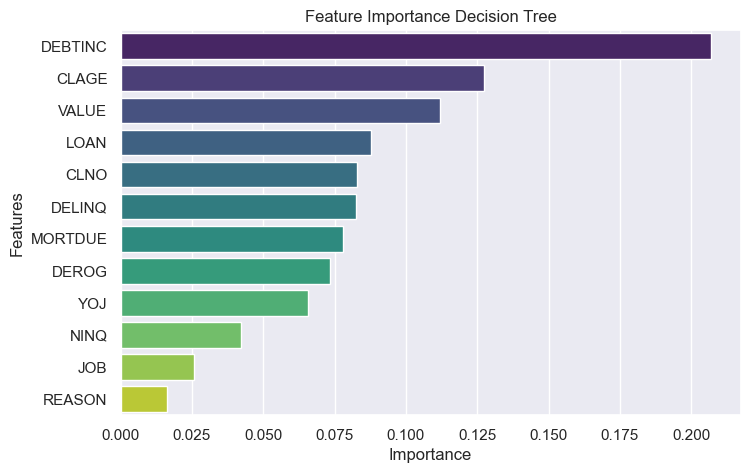

In [ ]:
importance=tree.feature_importances_
columns=x.columns
importance_tree=pd.DataFrame(importance, index=columns, columns=["Importance"]).sort_values(by="Importance",ascending=False)
plt.figure(figsize=(8,5))
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree.Importance, y=importance_tree.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance Decision Tree")

**Observation**: we note at this stage that the 5 top features identified by the Decision Tree model are:
- DEBTINC: first feature by a large advance
- CLAGE: second clear feature
- CLNO: almost equally important to the following feature (LOAN)
- LOAN
- VALUE: slightly less important than the previous two feautures

In order to clarify the importance of the features and, potentially, proceed to more feautre engineering, we will tune the model. At the moment, the least 3 relevant features appear to be REASON, JOB and NINQ.

## *Decision Tree Classifier - Tuning*

### **DT Tuning #1**

In [ ]:
dtree_estimator= DecisionTreeClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

parameters={"criterion": ["gini", "entropy"], "max_depth":[5,10,20,30,40], "min_samples_leaf":[1,2,4,6,8,10]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

gridCV=GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=10)

gridCV = gridCV.fit(x_train, y_train)

dtree_estimator=gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, max_depth=30,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



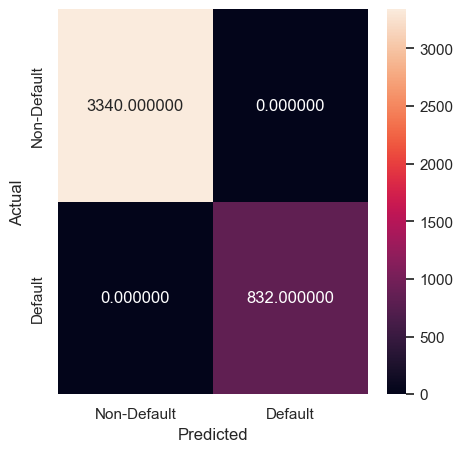

In [ ]:
y_train_pred_tree=dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_tree)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.70      0.63      0.66       357

    accuracy                           0.87      1788
   macro avg       0.81      0.78      0.79      1788
weighted avg       0.87      0.87      0.87      1788



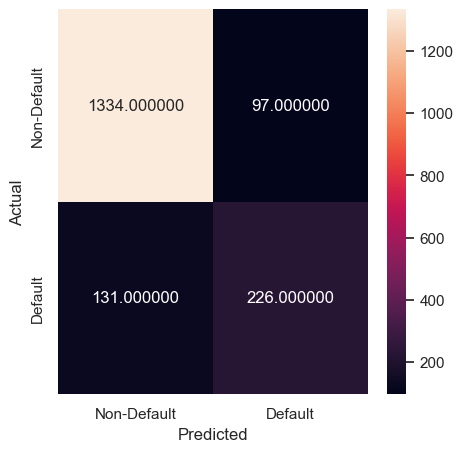

In [ ]:
y_test_pred_tree = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_tree)

In [ ]:
dtree_tuned_test=model_performance_classification(dtree_estimator, x_test, y_test)
dtree_tuned_test

Precision  Recall  Accuracy
0      0.805   0.783     0.872

**Observations**: rather than increasing, performance has stalled. It seems that the hyperparameters chosen by the GridSearchCV are not the best fit.
- Recall : remained as such
- Precision : decreased the most from .856 to .805
- Accuracy : slight increase form .870 to .872
We will give the tuning another go before moving on to the Random Forest.

### **DT Tuning #2**

In [ ]:
dtree_tuned2= DecisionTreeClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

parameters={"criterion": ["gini", "entropy"], "max_depth":[5,10,15], "min_samples_leaf":[2,4,6,8,10]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

gridCV=GridSearchCV(dtree_tuned2, parameters, scoring=scorer, cv=10)

gridCV = gridCV.fit(x_train, y_train)

dtree_tuned2=gridCV.best_estimator_

dtree_tuned2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.8, 1: 0.2}, criterion='entropy',
                       max_depth=15, min_samples_leaf=2, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



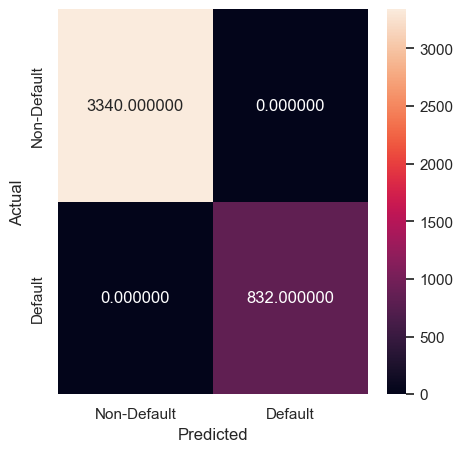

In [ ]:
y_train_tuned2_tree=dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_tuned2_tree)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1431
           1       0.70      0.63      0.66       357

    accuracy                           0.87      1788
   macro avg       0.81      0.78      0.79      1788
weighted avg       0.87      0.87      0.87      1788



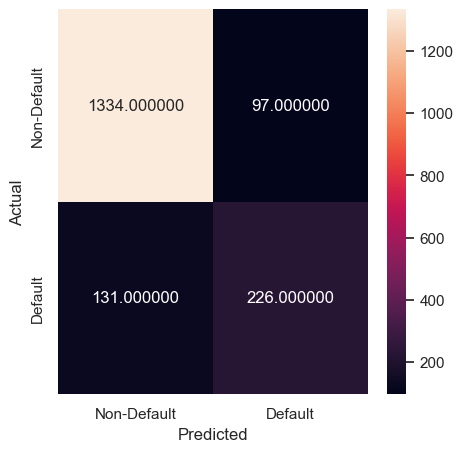

In [ ]:
y_test_tuned2_tree=dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_tuned2_tree)

In [ ]:
dtree_tuned2_test=model_performance_classification(dtree_tuned2, x_test, y_test)
dtree_tuned2_test

Precision  Recall  Accuracy
0      0.832   0.768     0.880

**Observations** the new tuning resulted in decreasing the size of the tree (to 15), while setting a minimum sample size (at 2). The result **decreased the recall further** (.757), while **improving the precision and the accuracy** (.832 and .880)
Recall being the most important feature, we will disregard these findings for the visualisation steps below.

### **DT Tuning #1 - Visualisation**

As the first tuned decision tree performed better, we will use it as a basis for the visualisations.

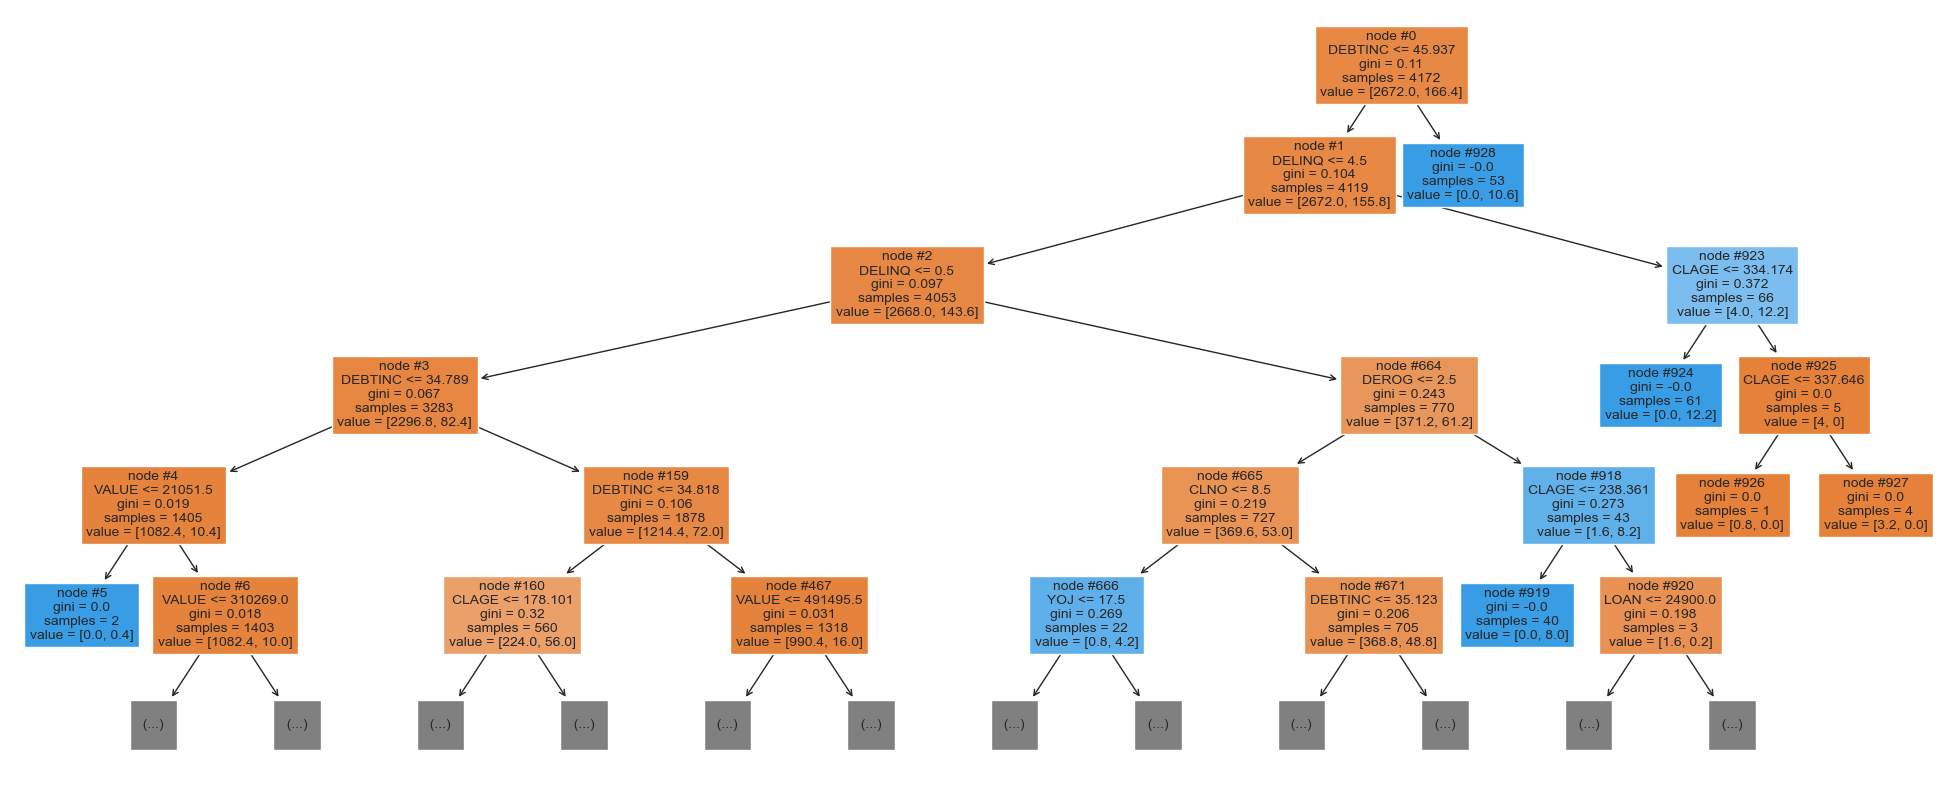

In [ ]:
#Decision Tree Tuned Visualisation
features=list(x.columns)
plt.figure(figsize=(25,10
                ))
plot_tree(dtree_estimator, max_depth=5, feature_names=features, filled=True, fontsize=10, node_ids=True, class_names=None)
plt.show()

**Observation** :
- **key importance of DEBTINC and CLAGE features remains** as these two lead to the two shortest paths of the tree.
- Shortest path : if **DEBTINC is above 45.937**
- second shortest path (4 level): DEBTINC <= 45.937, DELINQ above 4.5, CLAGE <= 334.174.
- weaker path (in 6 levels): DEBTINC above 45.937, DELINQ <= 4.5 and 0.5, DEBTINC <= 0.5, DEROG above 2.5, CLAGE <= 238.361.
- a number of other path seem to exist, however such cannot be visualised due to the chosen depth of the tree.

Thereore, we will resort to visualising the important features.

Text(0.5, 1.0, 'Feature Importance Decision Tree Tuned')

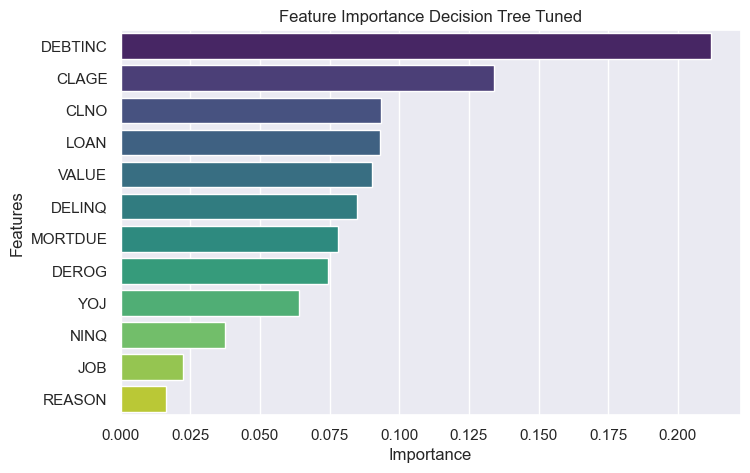

In [ ]:
#Feature Importance - Decision Tree Tuned
importance=dtree_estimator.feature_importances_
columns=x.columns
importance_tree_tuned=pd.DataFrame(importance, index=columns, columns=["Importance"]).sort_values(by="Importance",ascending=False)
plt.figure(figsize=(8,5))
palette=sns.color_palette("viridis", len(importance_tree))
sns.barplot(x=importance_tree_tuned.Importance, y=importance_tree_tuned.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance Decision Tree Tuned")

**Observations**: the key features remain largely the same, but change in order, and their importance changes in magnitude:
- DEBTINC: by far the most important feature (difference between this feature and the next has increased with the tuning)
- CLAGE
- CLNO
- LOAN
- VALUE

Least important value remains REASON, JOB and NINQ. However the importance of REASON seems to have decreased some more with the tuning. Before proceding with the feature engineering, and droping some less-important features, we will proceed with the Random Forest Classifier model to rely on the findings of a more robust model before dropping any information

## *Random Forest Classifier*

In [ ]:
rf_1=RandomForestClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)
rf_1.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



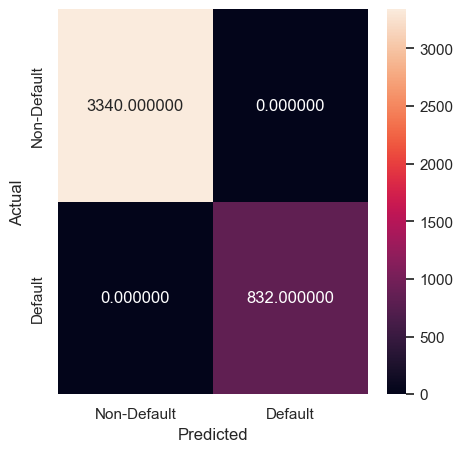

In [ ]:
y_train_rf1=rf_1.predict(x_train)
metrics_score(y_train, y_train_rf1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.87      0.66      0.75       357

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



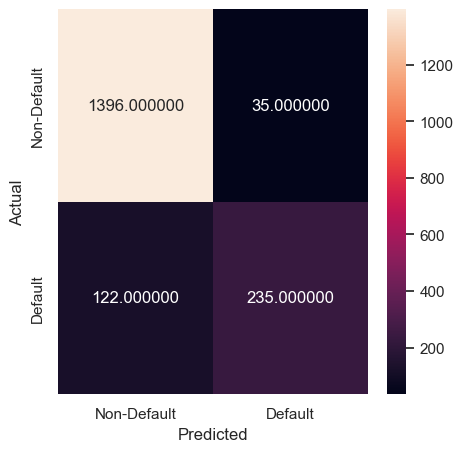

In [ ]:
y_test_rf1=rf_1.predict(x_test)
metrics_score(y_test, y_test_rf1)

In [ ]:
rf_1_test=model_performance_classification(rf_1, x_test, y_test)
rf_1_test

Precision  Recall  Accuracy
0      0.895   0.817     0.912

**Observations**: the model does not seem to be overfitting (training results: 100%).
The Random Forest Classifier model is performing better than the Decision Tree:
- Recall: increases to .817
- Precision: increases to .895
- Accuracy: increases to .912

The performance of the Accuracy are starting to be acceptable, however our focus is on the Recall rate, which should be maximised. To do so, we will first tune the hyperparameters, before attempting feature engineering measures.

### *Random Forest Classifier - Visualisation*

Text(0.5, 1.0, 'Feature Importance - Random Forest')

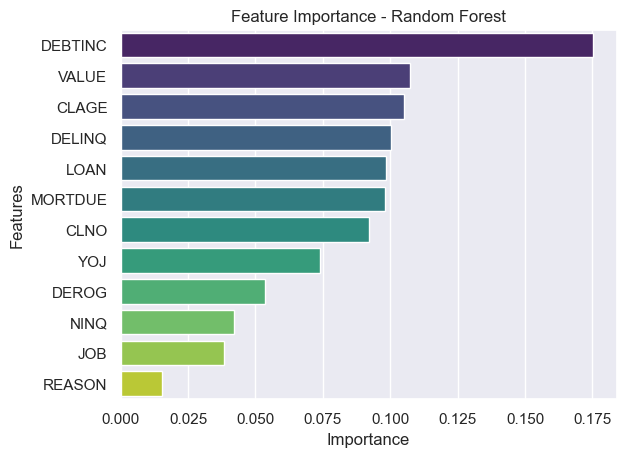

In [ ]:
#Feature Importance Visualisation
importances_rf1=rf_1.feature_importances_
columns=x.columns
importance_rf_1=pd.DataFrame(importances_rf1, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importance_rf_1))
sns.barplot(x=importance_rf_1.Importance, y=importance_rf_1.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest")

**Observation**: If the key features seem to remain the same, their order is changing from the Decision Tree tuned model:
- DEBTINC remains the key value, by far, although the "distance" between DEBTINC and the next most important feature has decreased slightly since the tuned DT model.
-  VALUE - CLAGE - very close 2nd and 3rd most important value.
- DELINQ - LOAN are the next most important values of the top 5, displaying very close importance between themselves and with MORTDUE, the next one in line.


Least important features: REASON, JOB, NINQ remain the least important features (although we note an inversion in the order between JOB and NINQ).

The tuning of the RF model should help us better differenciate the features by importance, and better identify the most and least important features.

## *Random Forest Classifier - Tuning*

## *Random Tree Classifier - Tuning #1*

In [ ]:
rf_1_tuned=RandomForestClassifier({0:0.80, 1:0.2}, random_state=1)

params_rf={"n_estimators":[100,200,300], "max_depth":[None, 10, 20], "max_features":["auto", "sqrt"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_1_tuned, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x_train, y_train)

rf_1_tuned=grid_obj.best_estimator_

In [ ]:
rf_1_tuned.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



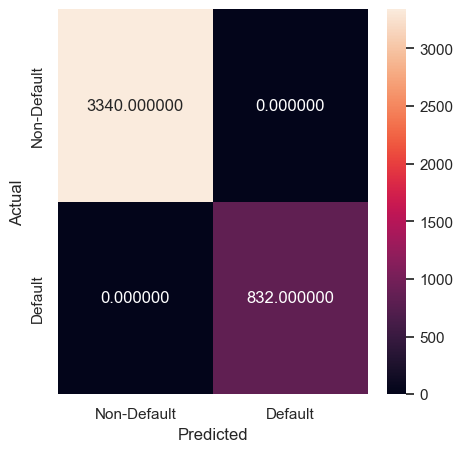

In [ ]:
y_train_rf_tuned1=rf_1_tuned.predict(x_train)

metrics_score(y_train, y_train_rf_tuned1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1431
           1       0.89      0.67      0.76       357

    accuracy                           0.92      1788
   macro avg       0.90      0.82      0.86      1788
weighted avg       0.91      0.92      0.91      1788



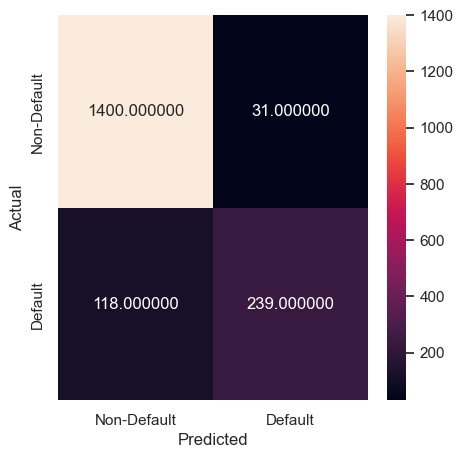

In [ ]:
y_test_rf_tuned1=rf_1_tuned.predict(x_test)

metrics_score(y_test, y_test_rf_tuned1)

In [ ]:
rf_1_tuned_test=model_performance_classification(rf_1_tuned,x_test,y_test)
rf_1_tuned_test

Precision  Recall  Accuracy
0      0.904   0.824     0.917

**Observations**: the model does not seem to be overfitting (training results: 100%), and the performance slightly improves on all metrics:
- Recall: increases from .817 to .822
- Precision: increases from .897 to .906
- Accuracy: increases from .913 to .917

The performance of the Accuracy are starting to be acceptable, however our **focus is on the Recall rate**, which should be maximised. To do so, **we will first tune the hyperparameters, before attempting feature engineering measures.**

### *Random Forest Tuned #1 - Visualisation*

Text(0.5, 1.0, 'Feature Importance - Random Forest Tuned')

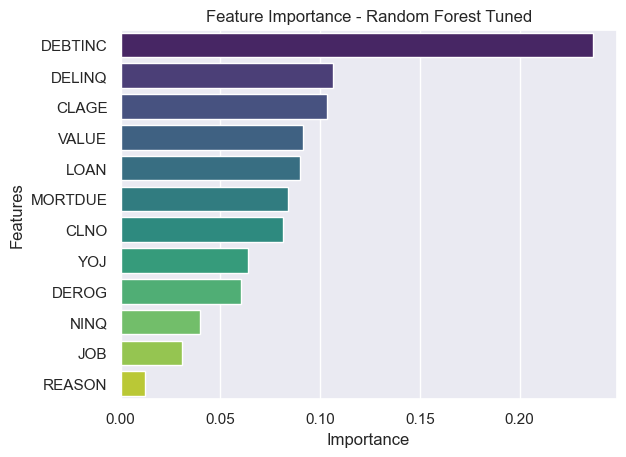

In [ ]:
#Feature Importance Visualisation
importances_rf1_tuned=rf_1_tuned.feature_importances_
columns=x.columns
importances_rf1_tuned=pd.DataFrame(importances_rf1_tuned, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importances_rf1_tuned))
sns.barplot(x=importances_rf1_tuned.Importance, y=importances_rf1_tuned.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest Tuned")

**Observations**: the key features remain the same, but the order changes again:
- DEBTINC - first feature by far, and importance improves from appro 0.180 to close to 0.25;
- DELINQ (replaced CLAGE), much lower than first freature, and slightly above 0.10
- CLAGE
- VALUE (very closely followed by LOAN)
- LOAN

Least important features: still REASON, JOB, NINQ. We will proceed with an incremental feature engineering, by interaticely dropping the lowest values.

## **Feature Engineering Exploration: REASON (+ JOB and NINQ)**
We iteratively dropped REASON, JOB and NINQ, but as performance dropped for JOB and NINQ, we reverted to displaying (below) the first option which only involved dropping REASON. The results of all iterations are visible in the Observations at the end of the section.

In [ ]:
dt_drop=dt.copy()
dt_drop=dt_drop.drop(["REASON"],axis=1)
dt_drop.head()

BAD  LOAN   MORTDUE      VALUE  JOB    YOJ  DEROG  DELINQ   CLAGE  NINQ  \
0    1  1100 25860.000  39025.000    0 10.500  0.000   0.000  94.367 1.000   
1    1  1300 70053.000  68400.000    0  7.000  0.000   2.000 121.833 0.000   
2    1  1500 13500.000  16700.000    0  4.000  0.000   0.000 149.467 1.000   
3    1  1500 65019.000  89235.500    0  7.000  0.000   0.000 173.467 1.000   
4    0  1700 97800.000 112000.000    1  3.000  0.000   0.000  93.333 0.000   

    CLNO  DEBTINC  
0  9.000   34.818  
1 14.000   34.818  
2 10.000   34.818  
3 20.000   34.818  
4 14.000   34.818

In [ ]:
x2=dt_drop.drop(["BAD"], axis=1)
y2=dt_drop["BAD"]

In [ ]:
x2_train, x2_test, y2_train, y2_test=train_test_split(x2,y2,test_size=0.3, random_state=1, stratify=y2)

print("x2 shape:", x2.shape)
print("y2 shape:", y2.shape)

x2 shape: (5960, 11)
y2 shape: (5960,)


In [ ]:
rf_1_tuned_drop=RandomForestClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

params_rf={"n_estimators":[100,200,300], "max_depth":[None, 10, 20], "max_features":["auto", "sqrt"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_1_tuned_drop, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x2_train, y2_train)

rf_1_tuned_drop=grid_obj.best_estimator_

In [ ]:
rf_1_tuned_drop.fit(x2_train, y2_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=300,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



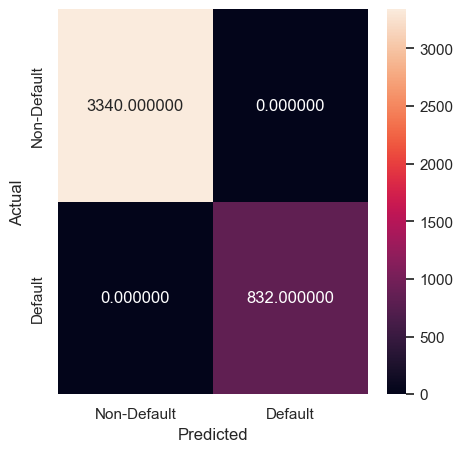

In [ ]:
y_train_rf_tuned1drop=rf_1_tuned_drop.predict(x2_train)

metrics_score(y2_train, y_train_rf_tuned1drop)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1431
           1       0.86      0.69      0.76       357

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.85      1788
weighted avg       0.91      0.91      0.91      1788



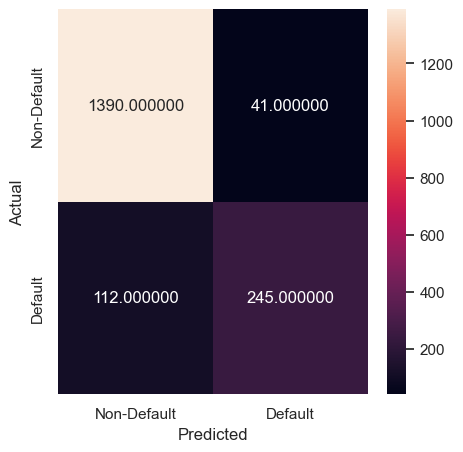

In [ ]:
y_test_rf_tuned1drop=rf_1_tuned_drop.predict(x2_test)

metrics_score(y2_test, y_test_rf_tuned1drop)

In [ ]:
rf_1_tuned_drop_test=model_performance_classification(rf_1_tuned_drop,x2_test,y2_test)
rf_1_tuned_drop_test

Precision  Recall  Accuracy
0      0.891   0.829     0.914

**Observations**: **our performance improved by dropping REASON**, but then dropped by dropping iteratively JOB and NINQ: (all 3 iterations not visible in the code due to readability concerns)
- **Recall drop REASON: .829** -- + drop JOB: .822 -- + drop NINQ: .807
- **Precision: .891** -- + drop JOB: .891 -- + drop NINQ: .872
- **Accuracy: .914** -- + drop JOB: .914 -- + drop NINQ: .903

We will therefore revert and only drop REASON from our main dataset and continue the tuning on that basis. We will later evaluate if dropping further options improves performance.

## **Random Forest - Tuning #2**

In [ ]:
rf_2_tuned=RandomForestClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

params_rf={"n_estimators":[100,200,300], "max_depth":[None, 10, 20], "max_features":["auto", "sqrt"], "min_samples_split": [2, 5, 10], "min_samples_leaf":[1,2,4]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_1_tuned_drop, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x2_train, y2_train)

rf_2_tuned=grid_obj.best_estimator_

In [ ]:
rf_2_tuned.fit(x2_train, y2_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=300,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



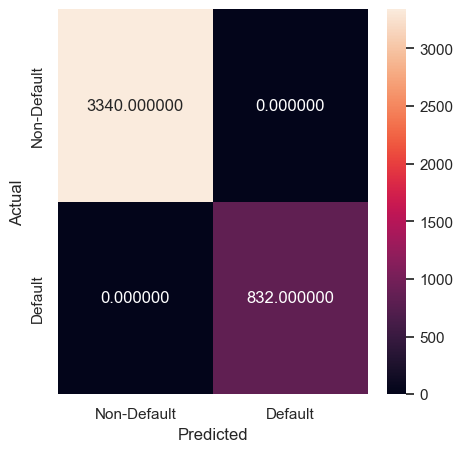

In [ ]:
y_train_rf_tuned2=rf_2_tuned.predict(x2_train)

metrics_score(y2_train, y_train_rf_tuned2)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1431
           1       0.86      0.69      0.76       357

    accuracy                           0.91      1788
   macro avg       0.89      0.83      0.85      1788
weighted avg       0.91      0.91      0.91      1788



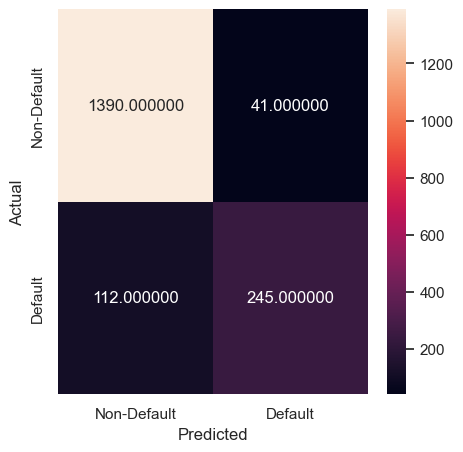

In [ ]:
y_test_rf_tuned2=rf_2_tuned.predict(x2_test)

metrics_score(y2_test, y_test_rf_tuned2)

In [ ]:
rf_2_tuned_test=model_performance_classification(rf_2_tuned,x2_test,y2_test)
rf_2_tuned_test

Precision  Recall  Accuracy
0      0.891   0.829     0.914

## **Feature Engineering - Outlier Treatment, Feature Dropping**

### *Outlier Treatment - MORTDUE*

In [ ]:
dt_outlier=dt_drop.copy()

In [ ]:
def outliers(col):
    Q1 = dt_outlier[col].quantile(0.25)
    Q3 = dt_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    min_value=Q1 - 1.5*IQR
    max_value=Q3 + 1.5*IQR
    dt_outlier[col]=dt_outlier[col].clip(lower=min_value, upper=max_value)
    return dt_outlier

In [ ]:
outliers("MORTDUE")

BAD   LOAN   MORTDUE      VALUE  JOB    YOJ  DEROG  DELINQ   CLAGE  \
0       1   1100 25860.000  39025.000    0 10.500  0.000   0.000  94.367   
1       1   1300 70053.000  68400.000    0  7.000  0.000   2.000 121.833   
2       1   1500 13500.000  16700.000    0  4.000  0.000   0.000 149.467   
3       1   1500 65019.000  89235.500    0  7.000  0.000   0.000 173.467   
4       0   1700 97800.000 112000.000    1  3.000  0.000   0.000  93.333   
...   ...    ...       ...        ...  ...    ...    ...     ...     ...   
5955    0  88900 57264.000  90185.000    0 16.000  0.000   0.000 221.809   
5956    0  89000 54576.000  92937.000    0 16.000  0.000   0.000 208.692   
5957    0  89200 54045.000  92924.000    0 15.000  0.000   0.000 212.280   
5958    0  89800 50370.000  91861.000    0 14.000  0.000   0.000 213.893   
5959    0  89900 48811.000  88934.000    0 15.000  0.000   0.000 219.601   

      NINQ   CLNO  DEBTINC  
0    1.000  9.000   34.818  
1    0.000 14.000   34.818  
2    1.000 10.000   34.818  
3    1.000 20.000   34.818  
4    0.000 14.000   34.818  
...    ...    ...      ...  
5955 0.000 16.000   36.112  
5956 0.000 15.000   35.860  
5957 0.000 15.000   35.557  
5958 0.000 16.000   34.341  
5959 0.000 16.000   34.572  

[5960 rows x 12 columns]

In [ ]:
x3=dt_outlier.drop(["BAD"], axis=1)
y3=dt_outlier["BAD"]
x3_train, x3_test, y3_train, y3_test=train_test_split(x3,y3,test_size=0.3, random_state=1, stratify=y3)

print("x3 shape:", x3.shape)
print("y3 shape:", y3.shape)

x3 shape: (5960, 11)
y3 shape: (5960,)


### *Random Forest  Tuning #3*

In [ ]:
rf_3_tuned=RandomForestClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

params_rf={"n_estimators":[200,300], "max_depth":[None, 10, 20], "max_features":["auto", "sqrt"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_3_tuned, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x3_train, y3_train)

rf_3_tuned=grid_obj.best_estimator_

In [ ]:
rf_3_tuned.fit(x3_train, y3_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=300,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



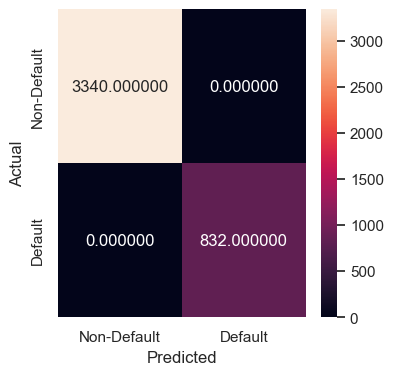

In [ ]:
y_train_rf_3_tuned=rf_3_tuned.predict(x3_train)

metrics_score(y3_train, y_train_rf_3_tuned)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1431
           1       0.87      0.69      0.77       357

    accuracy                           0.92      1788
   macro avg       0.90      0.83      0.86      1788
weighted avg       0.91      0.92      0.91      1788



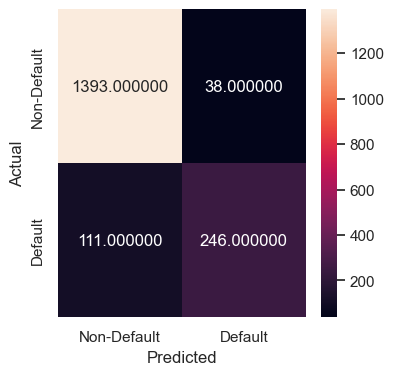

In [ ]:
y_test_rf_3_tuned=rf_3_tuned.predict(x3_test)

metrics_score(y3_test, y_test_rf_3_tuned)

In [ ]:
rf_3_tuned_test=model_performance_classification(rf_3_tuned,x3_test,y3_test)
rf_3_tuned_test

Precision  Recall  Accuracy
0      0.896   0.831     0.917

**Observations**: several combination were attempted including dropping outliers of MORTDUE, VALUE and CLAGE. However the **best results were achieved whilst conducting outlier treatment for MORTDUE only**:
- **Outlier treatment MORTDUE: recall .831**
- Outlier treatment MORTDUE and VALUE: recall .829
- Outlier treatment MORTDUE, VALUE and CLAGE: recall .830
- Outlier treatment MORTDUE and CLAGE: recall .828

### *Random Forest Tuning #3 - Visualisation*

Text(0.5, 1.0, 'Feature Importance - Random Forest Tuned #3')

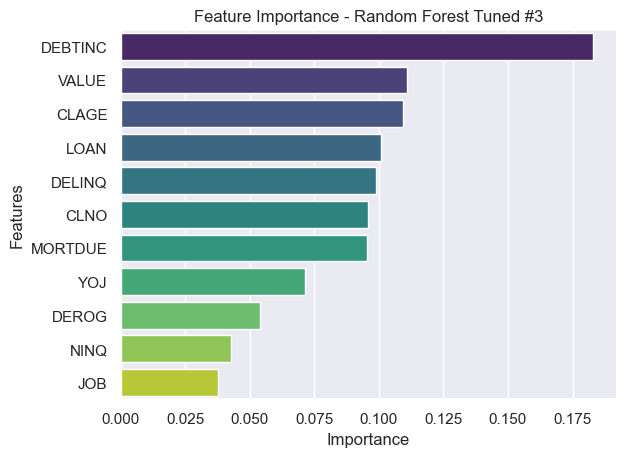

In [ ]:
#Feature Importance Visualisation
importances_rf_3_tuned=rf_3_tuned.feature_importances_
columns=x3.columns
importances_rf_3_tuned=pd.DataFrame(importances_rf_3_tuned, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importances_rf_3_tuned))
sns.barplot(x=importances_rf_3_tuned.Importance, y=importances_rf_3_tuned.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Random Forest Tuned #3")


**Observations**: DEBTINC remains the key feature in the mode, however we note some change in the following ones: DELINQ falls from 2nd to 5th place, VALUE comes 2nd (from 3rd), but remains very close to CLAGE.
LOAN comes 4th, very close to DELINQ.

Least important features remain JOB and NINQ.

### *Feature Dropping - MORTDUE*
In the EDA, it appeared that MORTDUE and VALUE were strongly correlated (0.9 on the heatmap).
In the latest feature importance mapping, it appeared that VALUE was more important than MORTDUE. We will try dropping MORTDUE to improve performance.

In [ ]:
dt_drop2=dt_drop.copy()
dt_drop2=dt_drop2.drop("MORTDUE", axis=1)
dt_drop2.head()

BAD  LOAN      VALUE  JOB    YOJ  DEROG  DELINQ   CLAGE  NINQ   CLNO  \
0    1  1100  39025.000    0 10.500  0.000   0.000  94.367 1.000  9.000   
1    1  1300  68400.000    0  7.000  0.000   2.000 121.833 0.000 14.000   
2    1  1500  16700.000    0  4.000  0.000   0.000 149.467 1.000 10.000   
3    1  1500  89235.500    0  7.000  0.000   0.000 173.467 1.000 20.000   
4    0  1700 112000.000    1  3.000  0.000   0.000  93.333 0.000 14.000   

   DEBTINC  
0   34.818  
1   34.818  
2   34.818  
3   34.818  
4   34.818

In [ ]:
x4=dt_drop2.drop(["BAD"], axis=1)
y4=dt_drop2["BAD"]
x4_train, x4_test, y4_train, y4_test=train_test_split(x4,y4,test_size=0.3, random_state=1, stratify=y3)

print("x4 shape:", x4.shape)
print("y4 shape:", y4.shape)

x4 shape: (5960, 10)
y4 shape: (5960,)


### *Random Forest - Tuning #4*

In [ ]:
rf_4_tuned=RandomForestClassifier(class_weight={0:0.80, 1:0.2}, random_state=1)

params_rf={"n_estimators":[200,300], "max_depth":[None, 10, 20], "max_features":["auto", "sqrt"]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(rf_4_tuned, params_rf, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x4_train, y4_train)

rf_4_tuned=grid_obj.best_estimator_

In [ ]:
rf_4_tuned.fit(x4_train, y4_train)

RandomForestClassifier(class_weight={0: 0.8, 1: 0.2}, n_estimators=300,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



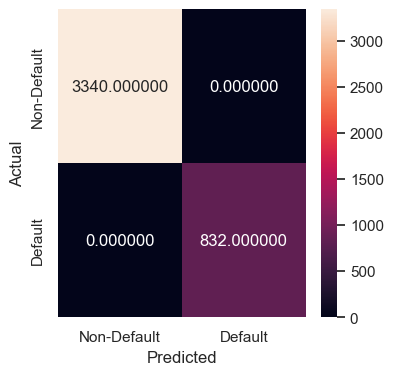

In [ ]:
y_train_rf_4_tuned=rf_4_tuned.predict(x4_train)

metrics_score(y4_train, y_train_rf_4_tuned)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1431
           1       0.85      0.68      0.75       357

    accuracy                           0.91      1788
   macro avg       0.88      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



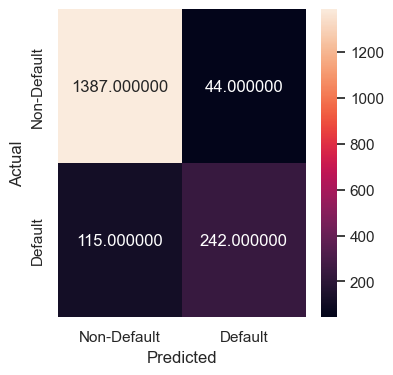

In [ ]:
y_test_rf_4_tuned=rf_4_tuned.predict(x4_test)

metrics_score(y4_test, y_test_rf_4_tuned)

In [ ]:
rf_4_tuned_test=model_performance_classification(rf_4_tuned,x4_test,y4_test)
rf_4_tuned_test

Precision  Recall  Accuracy
0      0.885   0.824     0.911

**Observations:** The performance is decreasing. We will revert to using our previous dataset (data_drop and associated indep. and dep. variables x3 and y3) to move forward.

## Boosting Models Test - Gradient Boosting,  XGBoost, LightGBM

### *Gradient Boosting*

In [ ]:
gradboost_model=GradientBoostingClassifier(random_state=1)
gradboost_model.fit(x3_train, y3_train)
gradboost_model_perf_test=model_performance_classification(gradboost_model, x3_train, y3_train)
gradboost_model_perf_test

Precision  Recall  Accuracy
0      0.905   0.840     0.922

**Observation**: **best performance to date for the Recall, as well as Precision and Accuracy.**

### *Boosting Models - XGBoost*

In [ ]:
XGBoost_model=XGBClassifier(random_state=1)
XGBoost_model.fit(x3_train, y3_train)
XGBoost_model_perf_test=model_performance_classification(XGBoost_model, x3_test, y3_test)
XGBoost_model_perf_test

Precision  Recall  Accuracy
0      0.895   0.827     0.915

**Observation**: the performance decreases below the level reached with the Random Forest and Gradient Boosting. We will proceed with the models already developped.

### *Boosting Models - Light GBM*

In [ ]:
lgbm=lgb.LGBMClassifier(class_weight={0: 0.80, 1: 0.2},random_state=1)
params_lgbm=    {"n_estimators": [200, 300],
    "max_depth": [10, 20, -1],
    "learning_rate": [0.01, 0.1, 0.2],
    "num_leaves": [31, 50, 100]
}
scorer=metrics.make_scorer(metrics.recall_score, pos_label=1)
grid_obj=GridSearchCV(lgbm, params_lgbm, scoring=scorer, cv=5)
grid_obj=grid_obj.fit(x3_train, y3_train)

In [ ]:
lgbm_tuned=grid_obj.best_estimator_

In [ ]:
y_train_lgbm_tuned = lgbm_tuned.predict(x3_train)
train_metrics = metrics.classification_report(y3_train, y_train_lgbm_tuned)
print("Training metrics:\n", train_metrics)

Training metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



In [ ]:
y_test_lgbm_tuned = lgbm_tuned.predict(x3_test)
test_metrics = metrics.classification_report(y3_test, y_test_lgbm_tuned)
print("Test metrics:\n", test_metrics)

Test metrics:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1431
           1       0.89      0.71      0.79       357

    accuracy                           0.92      1788
   macro avg       0.91      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



In [ ]:
lgbm_tuned_test=model_performance_classification(lgbm_tuned,x3_test,y3_test)
lgbm_tuned_test=pd.DataFrame(lgbm_tuned_test)
lgbm_tuned_test

Precision  Recall  Accuracy
0      0.912   0.842     0.924

**Observation**: this model seems to maximise the Accuracy (from .922 under the GradientBoost Classifier) to 0.924, however the Recall is plunging (from .840 under GradientBoost Classifier) to .705.

### *Boosting Model - CatBoost*

**Note for the corrector**: I ran the following model and found the results listed below in **Observations**, however, due to connection issues, I cannot get it to run again which is why I deleted the failed loading messaged and did not re-run de cells.

In [ ]:
import catboost as cb

In [ ]:
catboost_model=cb.CatBoostClassifier(random_state=1, silent=True)
params_catboost={"iterations": [200, 300, 500],
    "depth": [4, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2],
    "l2_leaf_reg": [1, 3, 5, 7],
    "border_count": [32, 50, 100],
    "bagging_temperature": [0.1, 0.5, 1.0],
    "rsm": [0.6, 0.8, 1.0]}
grid_catboost=GridSearchCV(catboost_model, params_catboost, scoring=scorer, cv=5)


In [ ]:
grid_catboost.fit(x3_train, y3_train)

In [ ]:
best_catboost=grid_catboost.best_estimator_

In [ ]:
y_test_pred_catboost=best_catboost.predict(x3_test, y3_test)
catboost_model_test=model_performance_classification(catboost_model,x4_test, y4_test)
catboost_model_test

**Observations**: the performance crashed down to 0.67 on the Recall metric, wihich, in isolation to all others, is enough of a fall not to further our exploration of such a model.

As the **Gradient Booster Model performed best in tis initial stage, we will further work on the tuning.**

## Gradient Boost - Tuning

### *Gradient Boosting - Tuning #1*

In [ ]:
#Reminder of GradienBoost Model Performance without Tuning
gradboost_model=GradientBoostingClassifier(random_state=1)
gradboost_model.fit(x3_train, y3_train)
gradboost_model_perf_test=model_performance_classification(gradboost_model, x3_train, y3_train)
gradboost_model_perf_test

Precision  Recall  Accuracy
0      0.905   0.840     0.922

In [ ]:
gradboost_tuned1=GradientBoostingClassifier(random_state=1)

params_gb={"n_estimators":[150], "max_depth":[10], "max_features":["sqrt"], "learning_rate":[0.4], "min_samples_split": [10], "min_samples_leaf": [4]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(gradboost_tuned1, params_gb, scoring=scorer, cv=3)
grid_obj=grid_obj.fit(x3_train, y3_train)

gradboost_tuned1=grid_obj.best_estimator_

In [ ]:
gradboost_tuned1.fit(x3_train, y3_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=10, max_features='sqrt',
                           min_samples_leaf=4, min_samples_split=10,
                           n_estimators=150, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



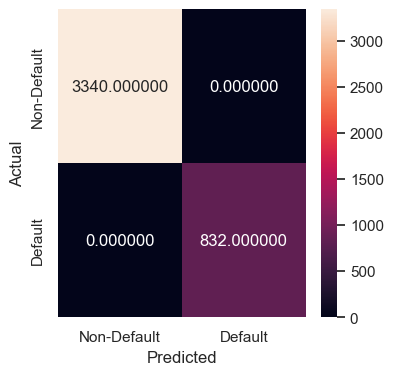

In [ ]:
y_train_gradboost_tuned1=gradboost_tuned1.predict(x3_train)

metrics_score(y3_train, y_train_gradboost_tuned1)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1431
           1       0.92      0.70      0.80       357

    accuracy                           0.93      1788
   macro avg       0.92      0.84      0.88      1788
weighted avg       0.93      0.93      0.92      1788



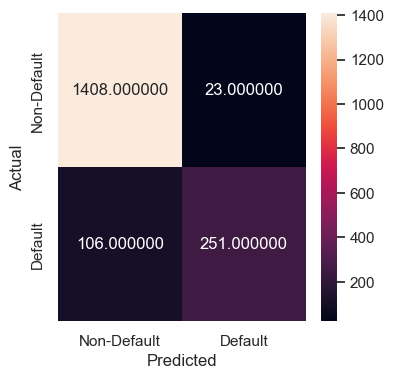

In [ ]:
y_test_gradboost_tuned1=gradboost_tuned1.predict(x3_test)

metrics_score(y3_test, y_test_gradboost_tuned1)

In [ ]:
gradboost_tuned_test1=model_performance_classification(gradboost_tuned1,x3_test,y3_test)
gradboost_tuned_test1

Precision  Recall  Accuracy
0      0.923   0.844     0.928

**Observation**: **higher performance to date with Recall at 0.844, and Precision and Accurcy above 0.92.** We aim to improve the Recall score a bit more, however these reslts were reached after 8 iterations (not included in the code for clarity's sake), and each took at least 10 minutes to load. Thus to further tune the model, I will reduce the dataset size and  cv score (cross validation) for the tuning.

### *Gradient Boost - Tuning #2*

In [ ]:
#Reducing Dataset size #2
x3_train_sample = x3_train.sample(frac=0.5, random_state=1)
y3_train_sample = y3_train.sample(frac=0.5, random_state=1)

In [ ]:
#Tuning #2
gradboost_tuned2=GradientBoostingClassifier(random_state=1)

params_gb={"n_estimators":[150], "max_depth":[10,11], "max_features":["sqrt"], "learning_rate":[0.38,0.39, 0.4], "min_samples_split": [10], "min_samples_leaf": [4], "subsample": [0.79, 0.8]}

scorer=metrics.make_scorer(recall_score, pos_label=1)

grid_obj=GridSearchCV(gradboost_tuned2, params_gb, scoring=scorer, cv=3)
grid_obj=grid_obj.fit(x3_train_sample, y3_train_sample)

gradboost_tuned2=grid_obj.best_estimator_

In [ ]:
gradboost_tuned2.fit(x3_train, y3_train)

GradientBoostingClassifier(learning_rate=0.38, max_depth=11,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=10, n_estimators=150,
                           random_state=1, subsample=0.8)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3340
           1       1.00      1.00      1.00       832

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



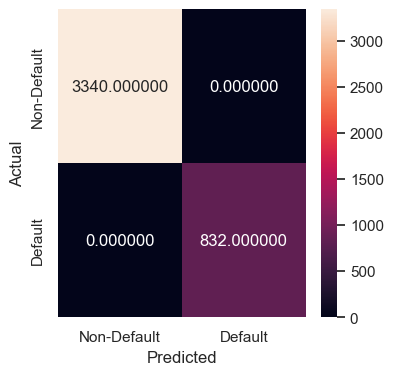

In [ ]:
y_train_gradboost_tuned2=gradboost_tuned2.predict(x3_train)

metrics_score(y3_train, y_train_gradboost_tuned2)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1431
           1       0.91      0.72      0.80       357

    accuracy                           0.93      1788
   macro avg       0.92      0.85      0.88      1788
weighted avg       0.93      0.93      0.93      1788



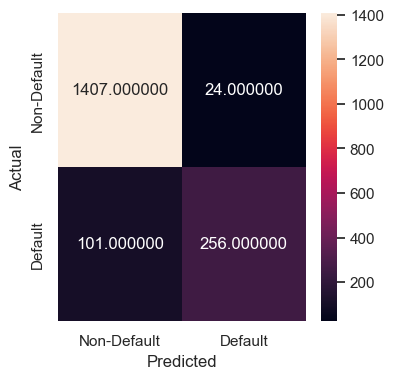

In [ ]:
y_test_gradboost_tuned2=gradboost_tuned2.predict(x3_test)

metrics_score(y3_test, y_test_gradboost_tuned2)

In [ ]:
gradboost_tuned_test2=model_performance_classification(gradboost_tuned2,x3_test,y3_test)
gradboost_tuned_test2

Precision  Recall  Accuracy
0      0.924   0.850     0.930

In [ ]:
gradboost_tuned_test2_df=pd.DataFrame(gradboost_tuned_test2, index=[0])

**Observations**: The hyperparameters reached the best performance achieved on the Recall score:
- **Recall : .850**
- Precision: .924
- Accuracy: .930

Another set of hyperparameters allowed to reach a better performance of Precision and Accuracy, but the focus being on Recall, I sided with the ones presented above.(max_depth 10 instead of 1, learning_rate 0.4 instead of 0.38, other hyperparameters unchanged):
- Recall : .847
- Precision: .932
- Accuracy: .931

**Gradient Booster - Tuning #3 - Visualisation**

Text(0.5, 1.0, 'Feature Importance - Gradient Booster Tuned #3')

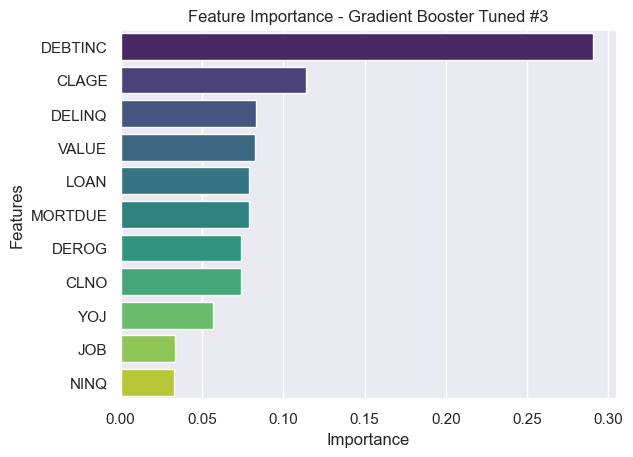

In [ ]:
#Feature Importance Visualisation
importances_gb_tuned=gradboost_tuned.feature_importances_
columns=x3.columns
importances_gb_tuned=pd.DataFrame(importances_gb_tuned, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)
palette=sns.color_palette("viridis", len(importances_gb_tuned))
sns.barplot(x=importances_gb_tuned.Importance, y=importances_gb_tuned.index, palette=palette)

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance - Gradient Booster Tuned #3")

**Observations**: the key features remain the same, whilst the least relevant ones, NINQ and JOBS have a close to equal importance scores.

We tried to drop the features but performance was decreasing (not included in the code for readibility purposes).

# Final Observations & Recommendations

In [ ]:
# We took out Logistic Regression from the table due to the different metrics being used

#We took out some of the models that we decided not to go with (ie: RF Tuning #4 which decreased performance,
#and led us to go back to RF Tuning #3)


models_test_comp_df = pd.concat(

    [ dtree_test.T, dtree_tuned_test.T, dtree_tuned2_test.T, rf_1_test.T, rf_1_tuned_test.T,
        rf_1_tuned_drop_test.T, rf_2_tuned_test.T, rf_3_tuned_test.T, gradboost_model_perf_test.T,
        XGBoost_model_perf_test.T, lgbm_tuned_test.T, gradboost_tuned_test1.T, gradboost_tuned_test2.T,], axis = 1,)

models_test_comp_df.columns = [
                               "Decision Tree Classifier",
                               "Decision Tree Tuning #1",
                               "Decision Tree Tuning #2",
                               "Random Forest Classifier",
                               "Random Forest Tuning #1",
                               "Random Forest Tuning #1 Drop",
                               "Random Forest Tuning #2",
                               "Random Forest Tuning #3",
                               "Gradient Boost",
                               "XGBoost",
                               "Light GBM",
                               "Gradient Boost Tuning #1",
                               "Gradient Boost Tuning #2"]

In [ ]:
models_test_comp_df

Decision Tree Classifier  Decision Tree Tuning #1  \
Precision                     0.806                    0.805   
Recall                        0.788                    0.783   
Accuracy                      0.874                    0.872   

           Decision Tree Tuning #2  Random Forest Classifier  \
Precision                    0.832                     0.895   
Recall                       0.768                     0.817   
Accuracy                     0.880                     0.912   

           Random Forest Tuning #1  Random Forest Tuning #1 Drop  \
Precision                    0.904                         0.891   
Recall                       0.824                         0.829   
Accuracy                     0.917                         0.914   

           Random Forest Tuning #2  Random Forest Tuning #3  Gradient Boost  \
Precision                    0.891                    0.896           0.905   
Recall                       0.829                    0.831           0.840   
Accuracy                     0.914                    0.917           0.922   

           XGBoost  Light GBM  Gradient Boost Tuning #1  \
Precision    0.895      0.912                     0.923   
Recall       0.827      0.842                     0.844   
Accuracy     0.915      0.924                     0.928   

           Gradient Boost Tuning #2  
Precision                     0.924  
Recall                        0.850  
Accuracy                      0.930

### **1. Techniques Performance and Steps for Improvement:**

The model exploration was primarily led by the importance of the **recall metric, set as the measure of success on this exercise**. Recall proved more difficult to improve that Precision and Accuracy, whic performed already quite well (about .8) in some of the untuned models, and passed the .9 performance grid in the early tuning stages. The final results are satisfactory for these two metrics, but there is still room for improvement on the Recall metric.

**Best model**: This exploration allowed us to settle for the Gradient Booster Model as the best performer (with tuning).

**Improvements:**
- **further hyperparameter tuning** with the introduction of new hyperparameters
- **further outlier treatment** of the features in order to improve performance or, at least, have a better differenciation of their importance. Indeed at the moment, expect for the top two features (DEBTINC and CLAGE), and the least important features (NINQ and JOB), the other features have a very close score (approx 0.02 difference). A better **understanding** of **the features' importance will help improve the bank's risk monitoring and mitigation mechanisms.**


### **2. Key insights & Buisness Recommendations:**

Key importance of **the debt-to-income ratio (DEBTINC)**. This feature appeared consistently, across all models and tuning stages as the key feature. It appears that above a certain ratio, meaning when clients' loans represent a higher proportion of their income, the risk of defaulting increases abruptly.
Before proceding further with the model development and roll-out, some initial buisness recommendations include:
- **improve data collection for DEBTINC and CLAGE**: **revise the bank's internal procedures to ensure that all clients' accounts' reflect the debt-to-income ratio as well as the age of the oldest credit line in the company**. For the DEBTINC, this might involve adding **additional requirements to access loans**, and should therefore be looked into more closely (namely with a thorough market analysis) as the bank would not want to create barriers that would push away potential clients. A middle spot should be found to ensure more complete data on the DEBTINC feature and CLAGE. The **CLAGE feature should be easier to address, as the data is available on the bank online platform,** however it seems that the collection is manual rather than automatic.
- **monitoring system per DEBTINC and CLAGE value range**: the EDA identified key risk groups within each features, which should be cross-analysed with the feature importance, for the bank to develop tailored monitoring mechanisms for the key features, and their high-risk sub-groups.
-- For instance: DEBTINC's highest risk, in absolute terms, seemed to fall in the 30-40 range (25.47% of defaulters), which should request close attention from the bank. It would also be advised to the bank to keep a close eye on the relative risk of the <10 range, as this group, although representing a smaller number of clients, includes 37.5% of defaulters.
A similar approach would be suggested for the CLAGE feature, **taking into account both the absolute risk (taking in total numbers), but also the relative risk (% of defaulters) to ensure a sound and healthy growth of the company's loaning activities.**


**Further risk mitigation methods for risky loans**: the bank might want to consider, as part of its monitoring of **higher-risk clients, to implement dedicated support activities, involving financial litteracy and education.** Indeed it would appear that the higher risk profile is amongst the higher ratios, which would be in the highest needs of such support. **Numerous studies have demonstrated that education is more effective than punishment to induce behaviour change**, thus this could be an alley to explore for the bank to limit the risks involved with loans that were already provided. (not furture loans, which might be denied for this clientele)

### **3. Proposal for the final solution design:**

*What model do you propose to be adopted? Why is this the best solution to adopt?*

We propose to adopt the **Gradient Booster Model (post tuning)** as such reached the best performance, and, **with the use of a decreased dataset**, was not computationally intensive in compares to highly tuned Random Forest models, or others such as CatBoost and LGM.
The **balance between performance and computational power** drives us toward this method for the implementation, although improvement steps could be implemented to improve performance further.

**Data collection and monitoring**: as monitoring develops, it would be handy to keep tuning the model, as well as 2-3 alternative models in parallel, as, as the data evolves, other models might start to perform better.
